In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from matplotlib_venn import venn3
from matplotlib.patches import Patch
from sklearn.neighbors import LocalOutlierFactor
from matplotlib_venn import venn2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.svm import OneClassSVM
from scipy.stats import zscore
import shap
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import OrdinalEncoder
import re

In [2]:
customers_df = pd.read_csv(r"E:\Trinity - Dissertation\Dataset\olist_customers_dataset.csv\olist_customers_dataset.csv")

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               5 non-null      object
 1   customer_unique_id        5 non-null      object
 2   customer_zip_code_prefix  5 non-null      int64 
 3   customer_city             5 non-null      object
 4   customer_state            5 non-null      object
dtypes: int64(1), object(4)
memory usage: 332.0+ bytes


In [5]:
geoloc_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_geolocation_dataset.csv\olist_geolocation_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\2056079099.py:1: SyntaxWarning: invalid escape sequence '\T'
  geoloc_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_geolocation_dataset.csv\olist_geolocation_dataset.csv")


In [6]:
geoloc_df['geolocation_state'].value_counts()

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

In [7]:
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
payments_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_payments_dataset.csv\olist_order_payments_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\1779146954.py:1: SyntaxWarning: invalid escape sequence '\T'
  payments_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_payments_dataset.csv\olist_order_payments_dataset.csv")


In [10]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
orderitems_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_items_dataset.csv\olist_order_items_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\4116819424.py:1: SyntaxWarning: invalid escape sequence '\T'
  orderitems_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_items_dataset.csv\olist_order_items_dataset.csv")


In [13]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
reviews_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_reviews_dataset.csv\olist_order_reviews_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\4154992201.py:1: SyntaxWarning: invalid escape sequence '\T'
  reviews_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_order_reviews_dataset.csv\olist_order_reviews_dataset.csv")


In [16]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [17]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
orders_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_orders_dataset.csv\olist_orders_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\4171385676.py:1: SyntaxWarning: invalid escape sequence '\T'
  orders_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_orders_dataset.csv\olist_orders_dataset.csv")


In [19]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
products_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_products_dataset.csv\olist_products_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3924231627.py:1: SyntaxWarning: invalid escape sequence '\T'
  products_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_products_dataset.csv\olist_products_dataset.csv")


In [22]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [24]:
sellers_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_sellers_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\781272683.py:1: SyntaxWarning: invalid escape sequence '\T'
  sellers_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\olist_sellers_dataset.csv")


In [25]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [26]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [27]:
productcat_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\product_category_name_translation.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\2423820311.py:1: SyntaxWarning: invalid escape sequence '\T'
  productcat_df = pd.read_csv("E:\Trinity - Dissertation\Dataset\product_category_name_translation.csv")


In [28]:
productcat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [29]:
productcat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Delivery anomalies

In [30]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
# Fixing Date Columns
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_estimated_delivery_date', 'order_delivered_customer_date']
orders_df[date_columns] = orders_df[date_columns].apply(pd.to_datetime)

In [34]:
# Negative Delivery Time
orders_df['total_delivery_time_days'] = (
    orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
).dt.days

orders_df['total_delivery_time_days'].describe()

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: total_delivery_time_days, dtype: float64

In [35]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [36]:
orders_df[orders_df['total_delivery_time_days']<0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_delivery_time_days


In [37]:
orders_df.duplicated().sum()

0

In [38]:
orders_df['order_id'].duplicated().sum()

0

In [39]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [40]:
# Focusing only on 'delivered' status for delivery anomalies
orders_df = orders_df[orders_df['order_status'] == 'delivered']

In [41]:
orders_df.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
total_delivery_time_days          8
dtype: int64

In [42]:
# Missing delivery anomalies
orders_df['missing_delivery_flag'] = orders_df['order_delivered_customer_date'].isnull().astype(int)

In [43]:
orders_df['missing_delivery_flag'].value_counts()

missing_delivery_flag
0    96470
1        8
Name: count, dtype: int64

In [44]:
valid_orders_df = orders_df[orders_df['missing_delivery_flag'] == 0].copy()

In [45]:
valid_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_delivery_time_days,missing_delivery_flag
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,0


In [46]:
valid_orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
total_delivery_time_days          0
missing_delivery_flag             0
dtype: int64

In [47]:
valid_orders_df = (
    valid_orders_df
      #  drop orders missing approval or carrier pickup dates
      .dropna(subset=['order_approved_at', 'order_delivered_carrier_date'])
)

#### Feature Engineering

In [48]:
# Temporal & SLA features 
valid_orders_df = valid_orders_df.copy()

valid_orders_df['approval_lag_days'] = (
    valid_orders_df['order_approved_at'] 
  - valid_orders_df['order_purchase_timestamp']
).dt.total_seconds() / 86400

valid_orders_df['processing_time_days'] = (
    valid_orders_df['order_delivered_carrier_date'] 
  - valid_orders_df['order_approved_at']
).dt.total_seconds() / 86400

valid_orders_df['delay_vs_estimate_days'] = (
    valid_orders_df['order_delivered_customer_date'] 
  - valid_orders_df['order_estimated_delivery_date']
).dt.total_seconds() / 86400

# Late delivery flag 
valid_orders_df['is_late_delivery'] = valid_orders_df['delay_vs_estimate_days'] > 0

# Early/on-time deliveries 
valid_orders_df['delivery_status'] = np.select(
    [
      valid_orders_df['delay_vs_estimate_days']  > 0,
      valid_orders_df['delay_vs_estimate_days'] == 0,
      valid_orders_df['delay_vs_estimate_days']  < 0,
    ],
    ['late', 'on_time', 'early'],
    default='unknown'
)

valid_orders_df[['delay_vs_estimate_days','is_late_delivery','delivery_status']].head()
print(f"Total orders kept: {len(valid_orders_df)}")
print("Late orders: ", valid_orders_df['is_late_delivery'].sum())

Total orders kept: 96455
Late orders:  7825


In [49]:
valid_orders_df.count()

order_id                         96455
customer_id                      96455
order_status                     96455
order_purchase_timestamp         96455
order_approved_at                96455
order_delivered_carrier_date     96455
order_delivered_customer_date    96455
order_estimated_delivery_date    96455
total_delivery_time_days         96455
missing_delivery_flag            96455
approval_lag_days                96455
processing_time_days             96455
delay_vs_estimate_days           96455
is_late_delivery                 96455
delivery_status                  96455
dtype: int64

In [50]:
# Filter geolocation to Brazil’s bounding box
LAT_NORTH =  5.27438888    # 5°16′27.8″ N
LAT_SOUTH = -33.75116944   # 33°45′04.21″ S
LNG_WEST  = -73.98283055   # 73°58′58.19″ W
LNG_EAST  = -34.79314722   # 34°47′35.33″ W

geo_filtered = geoloc_df[
    (geoloc_df.geolocation_lat  <= LAT_NORTH) &
    (geoloc_df.geolocation_lat  >= LAT_SOUTH) &
    (geoloc_df.geolocation_lng  >= LNG_WEST ) &
    (geoloc_df.geolocation_lng  <= LNG_EAST )
].copy()

# Brazil-only geos
zip_geo = (
    geo_filtered
    .groupby('geolocation_zip_code_prefix')
    .agg(
        lat=('geolocation_lat', 'first'),
        lng=('geolocation_lng', 'first')
    )
    .reset_index()
)

# Merging co-ordinates into sellers & customers
sellers_geo = (
    sellers_df
    .merge(zip_geo,
           left_on='seller_zip_code_prefix',
           right_on='geolocation_zip_code_prefix',
           how='inner')  # drop non-Brazil sellers
    .rename(columns={'lat':'seller_lat','lng':'seller_lng'})
    [['seller_id','seller_lat','seller_lng', 'seller_state','seller_city']]
)

customers_geo = (
    customers_df
    .merge(zip_geo,
           left_on='customer_zip_code_prefix',
           right_on='geolocation_zip_code_prefix',
           how='inner')  # drop non-Brazil customers
    .rename(columns={'lat':'customer_lat','lng':'customer_lng'})
    [['customer_id','customer_lat','customer_lng', 'customer_state', 'customer_city']]
)

# Merging sellers and Orders
order_sellers = (
    orderitems_df
    .groupby('order_id')['seller_id']
    .first()
    .reset_index()
)

valid_orders_df = (
    valid_orders_df
    .merge(order_sellers, on='order_id', how='left')
    .merge(sellers_geo,   on='seller_id',   how='inner')
    .merge(customers_geo, on='customer_id', how='inner')
)

# Haversine distance in km 
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, (lon1, lat1, lon2, lat2))
    dlon, dlat = lon2 - lon1, lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 6371 * 2 * asin(sqrt(a))

valid_orders_df['distance_km'] = valid_orders_df.apply(
    lambda row: haversine(
        row.seller_lng, row.seller_lat,
        row.customer_lng, row.customer_lat
    ),
    axis=1
)

print(f"Orders with Brazil-only distances: {len(valid_orders_df)}")
valid_orders_df[['seller_lat','seller_lng','customer_lat','customer_lng','distance_km', 'seller_state','seller_city', 'customer_city','customer_state']].head()

Orders with Brazil-only distances: 95976


,seller_lat,seller_lng,customer_lat,customer_lng,distance_km,seller_state,seller_city,customer_city,customer_state
0,-23.680114,-46.452454,-23.574809,-46.587471,18.063837,SP,maua,sao paulo,SP
1,-19.810119,-43.984727,-12.169860,-44.988369,856.292580,SP,belo horizonte,barreiras,BA
2,-21.362358,-48.232976,-16.746337,-48.514624,514.130333,SP,guariba,vianopolis,GO
3,-19.840168,-43.923299,-5.767733,-35.275467,1822.800366,MG,belo horizonte,sao goncalo do amarante,RN
4,-23.551707,-46.260979,-23.675037,-46.524784,30.174037,SP,mogi das cruzes,santo andre,SP


In [51]:
valid_orders_df.count()

order_id                         95976
customer_id                      95976
order_status                     95976
order_purchase_timestamp         95976
order_approved_at                95976
order_delivered_carrier_date     95976
order_delivered_customer_date    95976
order_estimated_delivery_date    95976
total_delivery_time_days         95976
missing_delivery_flag            95976
approval_lag_days                95976
processing_time_days             95976
delay_vs_estimate_days           95976
is_late_delivery                 95976
delivery_status                  95976
seller_id                        95976
seller_lat                       95976
seller_lng                       95976
seller_state                     95976
seller_city                      95976
customer_lat                     95976
customer_lng                     95976
customer_state                   95976
customer_city                    95976
distance_km                      95976
dtype: int64

In [52]:
# Order composition & payment features
# Aggregate number of items and total freight per order
items_agg = (
    orderitems_df
    .groupby('order_id')
    .agg(
        n_items=('order_item_id', 'count'),
        total_freight_value=('freight_value', 'sum')
    )
    .reset_index()
)

# Aggregate total order payment per order
payments_agg = (
    payments_df
    .groupby('order_id')
    .agg(
        total_order_value=('payment_value', 'sum')
    )
    .reset_index()
)

# Merging aggregates into valid_orders_df
valid_orders_df = (
    valid_orders_df
    .merge(items_agg,    on='order_id', how='left')
    .merge(payments_agg, on='order_id', how='left')
)

# Computing combined total payment (order value + freight)
valid_orders_df['total_payment_value'] = (
    valid_orders_df['total_order_value']
  + valid_orders_df['total_freight_value']
)

valid_orders_df[['n_items', 'total_freight_value', 'total_order_value', 'total_payment_value']].head()

,n_items,total_freight_value,total_order_value,total_payment_value
0,1,8.72,38.71,47.43
1,1,22.76,141.46,164.22
2,1,19.22,179.12,198.34
3,1,27.20,72.20,99.40
4,1,8.72,28.62,37.34


In [53]:
valid_orders_df.count()

order_id                         95976
customer_id                      95976
order_status                     95976
order_purchase_timestamp         95976
order_approved_at                95976
order_delivered_carrier_date     95976
order_delivered_customer_date    95976
order_estimated_delivery_date    95976
total_delivery_time_days         95976
missing_delivery_flag            95976
approval_lag_days                95976
processing_time_days             95976
delay_vs_estimate_days           95976
is_late_delivery                 95976
delivery_status                  95976
seller_id                        95976
seller_lat                       95976
seller_lng                       95976
seller_state                     95976
seller_city                      95976
customer_lat                     95976
customer_lng                     95976
customer_state                   95976
customer_city                    95976
distance_km                      95976
n_items                  

In [54]:
valid_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
total_delivery_time_days         0
missing_delivery_flag            0
approval_lag_days                0
processing_time_days             0
delay_vs_estimate_days           0
is_late_delivery                 0
delivery_status                  0
seller_id                        0
seller_lat                       0
seller_lng                       0
seller_state                     0
seller_city                      0
customer_lat                     0
customer_lng                     0
customer_state                   0
customer_city                    0
distance_km                      0
n_items                          0
total_freight_value              0
total_order_value                1
total_payment_value 

In [55]:
# Remove nulls
valid_orders_df = valid_orders_df.dropna(
    subset=['total_order_value', 'total_payment_value']
)

#### Rule and Statisitical Based Detection

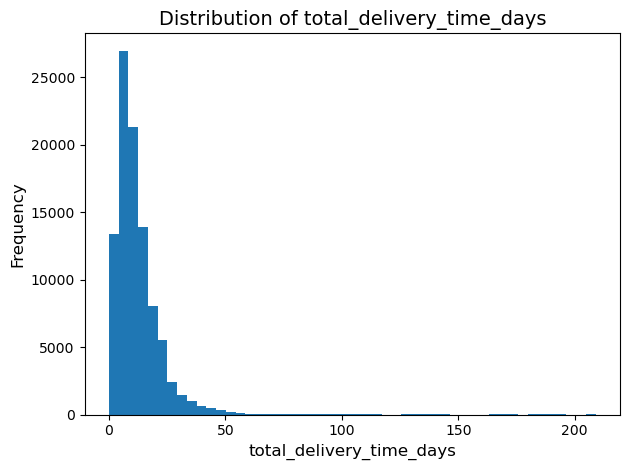

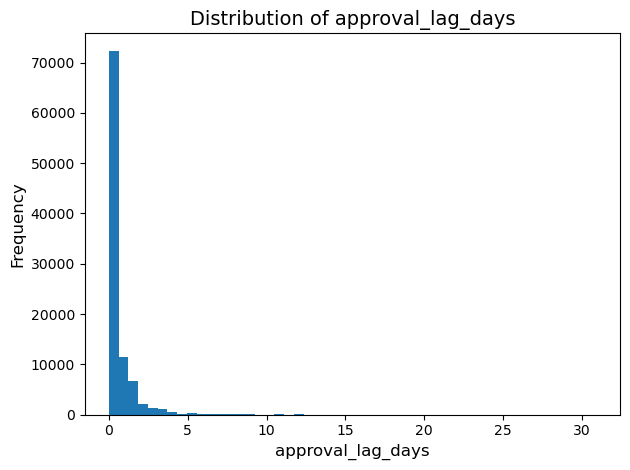

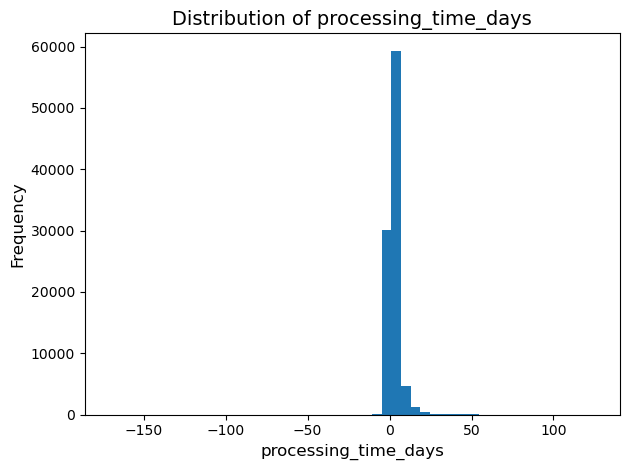

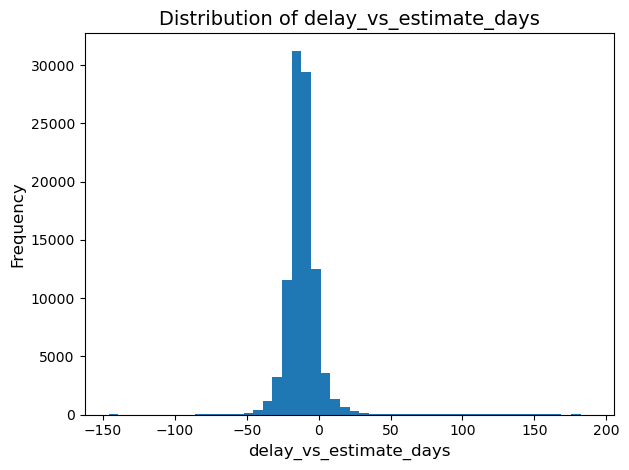

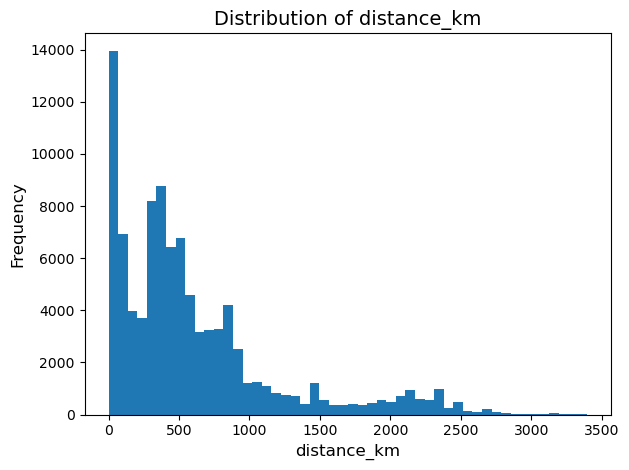

In [56]:
metrics = [
    'total_delivery_time_days',
    'approval_lag_days',
    'processing_time_days',
    'delay_vs_estimate_days',
    'distance_km'
]

for metric in metrics:
    plt.figure()
    plt.hist(valid_orders_df[metric].dropna(), bins=50)
    plt.title(f'Distribution of {metric}', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()

plt.show()


In [57]:
# IQR threshold
def iqr_threshold(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q3 + 1.5 * iqr

# Computing thresholds
th_delivery   = iqr_threshold(valid_orders_df['total_delivery_time_days'])
th_approval   = iqr_threshold(valid_orders_df['approval_lag_days'])
th_distance   = iqr_threshold(valid_orders_df['distance_km'])

# For SLA‐breach, only looking at late deliveries
positive_delays = valid_orders_df.loc[
    valid_orders_df['delay_vs_estimate_days'] > 0, 
    'delay_vs_estimate_days'
]
th_delay = iqr_threshold(positive_delays)

# Applying the  IQR‐based rules 
valid_orders_df['rule_late_sla']        = valid_orders_df['delay_vs_estimate_days']   > th_delay        # SLA breach
valid_orders_df['rule_extreme_transit'] = valid_orders_df['total_delivery_time_days']        > th_delivery     # Extreme transit
valid_orders_df['rule_slow_approval']   = valid_orders_df['approval_lag_days']         > th_approval     # Slow approval
valid_orders_df['rule_long_haul']       = valid_orders_df['distance_km']               > th_distance     # Long-haul shipments

valid_orders_df[
    ['rule_late_sla','rule_extreme_transit','rule_slow_approval','rule_long_haul']
].sum()


rule_late_sla            499
rule_extreme_transit    4988
rule_slow_approval      8879
rule_long_haul          7404
dtype: int64

In [58]:
valid_orders_df['rule_any_anomaly'] = valid_orders_df[
    ['rule_late_sla', 'rule_extreme_transit', 'rule_slow_approval', 'rule_long_haul']
].max(axis=1)

In [59]:
valid_orders_df['rule_any_anomaly'].value_counts()

rule_any_anomaly
False    77227
True     18748
Name: count, dtype: int64

In [60]:
# Boolean to integer (0 = Normal, 1 = Anomaly)
valid_orders_df['rule_any_anomaly_flag'] = valid_orders_df['rule_any_anomaly'].map({False: 0, True: 1})

valid_orders_df['rule_any_anomaly_label'] = valid_orders_df['rule_any_anomaly_flag'].map({0: 'Normal', 1: 'Anomaly'})

In [61]:
valid_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_delivery_time_days,missing_delivery_flag,...,total_freight_value,total_order_value,total_payment_value,rule_late_sla,rule_extreme_transit,rule_slow_approval,rule_long_haul,rule_any_anomaly,rule_any_anomaly_flag,rule_any_anomaly_label
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,0,...,8.72,38.71,47.43,False,False,False,False,False,0,Normal
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,0,...,22.76,141.46,164.22,False,False,False,False,False,0,Normal
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,0,...,19.22,179.12,198.34,False,False,False,False,False,0,Normal
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,0,...,27.20,72.20,99.40,False,False,False,True,True,1,Anomaly
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,0,...,8.72,28.62,37.34,False,False,False,False,False,0,Normal


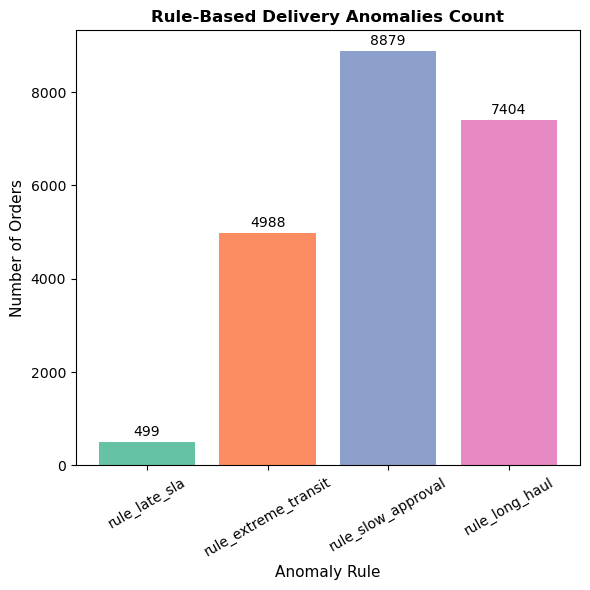

In [62]:
anomaly_counts = valid_orders_df[[
    'rule_late_sla',
    'rule_extreme_transit',
    'rule_slow_approval',
    'rule_long_haul'
]].sum()


cmap = plt.get_cmap('Set2')
colors = cmap.colors[:4]
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(anomaly_counts.index, anomaly_counts.values, color=colors)
ax.bar_label(bars, labels=anomaly_counts.astype(int), padding=2)

ax.set_title('Rule-Based Delivery Anomalies Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Orders', fontsize=11)
ax.set_xlabel('Anomaly Rule', fontsize=11)
ax.tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

#### ML Based Anomaly detection

In [63]:
# Fix negative delay_days
valid_orders_df['delay_days'] = (
    valid_orders_df['delay_vs_estimate_days']
      .where(valid_orders_df['delay_vs_estimate_days'] > 0, 0)
)

# Fix negative processing_time_days
valid_orders_df['processing_time_days'] = (
    valid_orders_df['processing_time_days']
      .where(valid_orders_df['processing_time_days'] >= 0, 0)
)
features = [
    'total_delivery_time_days',
    'approval_lag_days',
    'processing_time_days',
    'delay_days',
    'distance_km',
    'n_items',
    'total_freight_value',
    'total_order_value',
    'total_payment_value'
    
]

In [64]:
valid_orders_df[features].head()

,total_delivery_time_days,approval_lag_days,processing_time_days,delay_days,distance_km,n_items,total_freight_value,total_order_value,total_payment_value
0,8.0,0.007431,2.366493,0.0,18.063837,1,8.72,38.71,47.43
1,13.0,1.279745,0.462882,0.0,856.292580,1,22.76,141.46,164.22
2,9.0,0.011505,0.204595,0.0,514.130333,1,19.22,179.12,198.34
3,13.0,0.012419,3.745833,0.0,1822.800366,1,27.20,72.20,99.40
4,2.0,0.042940,0.893113,0.0,30.174037,1,8.72,28.62,37.34


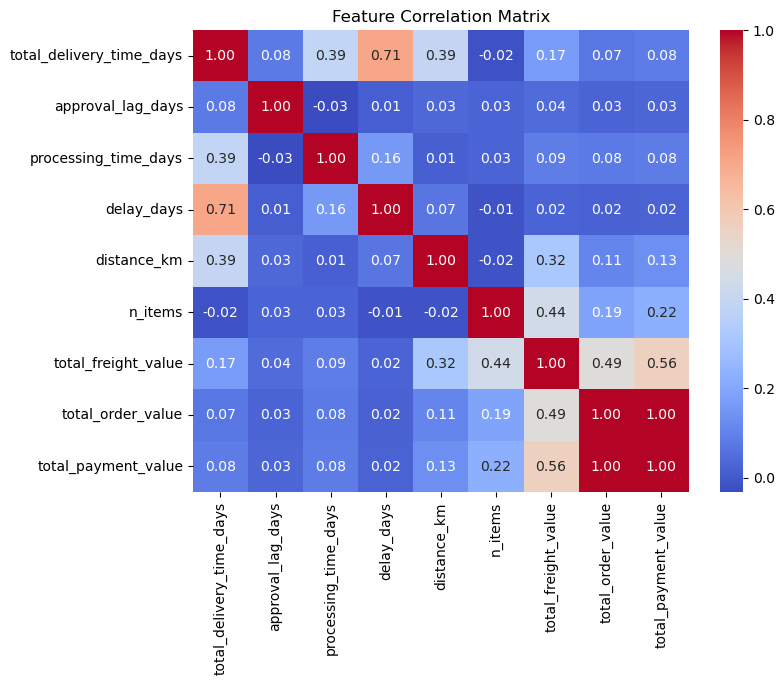

In [65]:
corr_matrix = valid_orders_df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [66]:
X = valid_orders_df[features].dropna()  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\Arushi\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    Feature       VIF
0  total_delivery_time_days  7.624751
1         approval_lag_days  1.264042
2      processing_time_days  2.160731
3                delay_days  2.281549
4               distance_km  3.055260
5                   n_items  3.583102
6       total_freight_value       inf
7         total_order_value       inf
8       total_payment_value       inf


In [67]:
selected_features = [
    'approval_lag_days',
    'processing_time_days',
    'delay_days',
    'distance_km',
    'n_items',
    'total_payment_value'   
]


In [68]:
X = valid_orders_df[selected_features].dropna()  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature       VIF
0     approval_lag_days  1.222660
1  processing_time_days  1.588738
2            delay_days  1.058620
3           distance_km  1.798238
4               n_items  2.566035
5   total_payment_value  1.753815


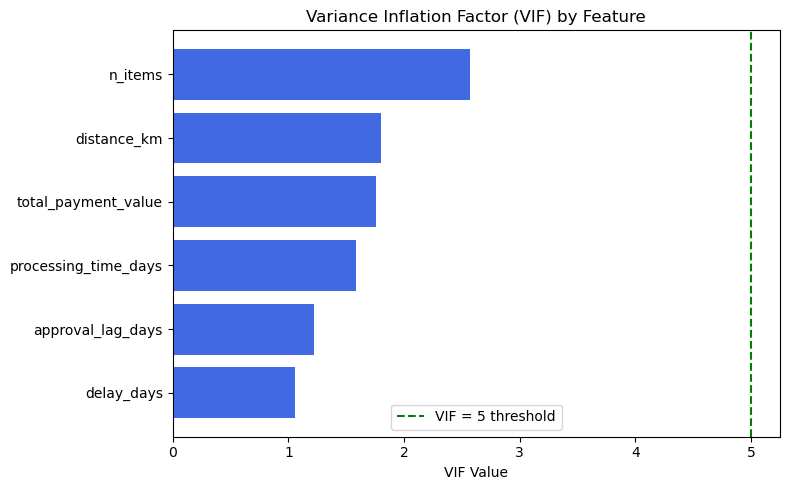

In [69]:
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(vif_data["Feature"], vif_data["VIF"], color='royalblue')  
plt.axvline(x=5, color='green', linestyle='--', label='VIF = 5 threshold')  
plt.xlabel("VIF Value")
plt.title("Variance Inflation Factor (VIF) by Feature")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(False) 
plt.tight_layout()
plt.show()


In [70]:
X = valid_orders_df[selected_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Contamination of 5%
isoforest = IsolationForest(contamination=0.05, random_state=42)
isoforest.fit(X_scaled)

# Predict: 1 = anomaly, 0 = normal
valid_orders_df['anomaly_iso_forest'] = isoforest.predict(X_scaled)
valid_orders_df['anomaly_iso_forest'] = valid_orders_df['anomaly_iso_forest'].map({1: 0, -1: 1})

In [72]:
print(valid_orders_df['anomaly_iso_forest'].value_counts())
valid_orders_df['anomaly_label_iso_forest'] = valid_orders_df['anomaly_iso_forest'].map({0: 'Normal', 1: 'Anomaly'})

anomaly_iso_forest
0    91176
1     4799
Name: count, dtype: int64


C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\2669320765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


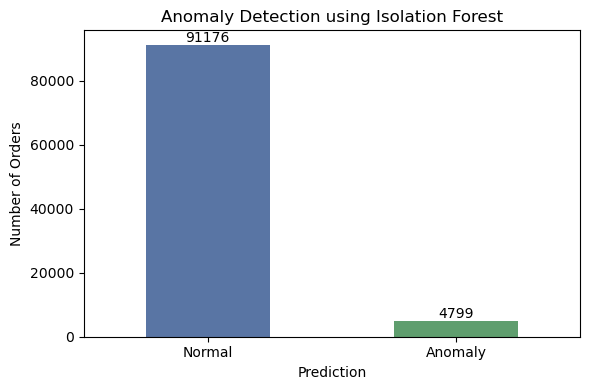

In [73]:
custom_palette = {'Normal': '#4c72b0', 'Anomaly': '#55a868'}

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=valid_orders_df,
    x='anomaly_label_iso_forest',
    palette=custom_palette,
    width=0.5 
)

# Adding bar labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        height + 5,               
        f'{int(height)}',              
        ha='center', va='bottom', fontsize=10
    )

plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Prediction")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

In [74]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

In [75]:
# Fetching anomaly scores from the model
anomaly_scores = isoforest.decision_function(X_scaled)  

valid_orders_df = valid_orders_df.loc[X.index].copy() 
valid_orders_df['anomaly_score_iso_forest'] = anomaly_scores

# Filter only anomalous records
anomalous_df = valid_orders_df[valid_orders_df['anomaly_iso_forest'] == 1]
top_10_anomalies = anomalous_df.sort_values(by='anomaly_score_iso_forest').head(10)

columns_to_display = [
   'order_id','anomaly_label_iso_forest', 'anomaly_score_iso_forest', 'seller_city','seller_state','customer_city', 'customer_state', 'distance_km',
    'approval_lag_days', 'processing_time_days', 'delay_days',
    'n_items', 'total_payment_value' 
]

top_10_anomalies_display = top_10_anomalies[columns_to_display]
top_10_anomalies_display

,order_id,anomaly_label_iso_forest,anomaly_score_iso_forest,seller_city,seller_state,customer_city,customer_state,distance_km,approval_lag_days,processing_time_days,delay_days,n_items,total_payment_value
31203,2cc9089445046817a7539d90805e6e5a,Anomaly,-0.239591,porto alegre,RS,divinopolis,MG,1265.589521,4.077905,7.955880,0.000000,6,6228.48
30092,777c67eab7c0712ccde8ffbb22715adb,Anomaly,-0.233176,sao paulo,SP,porto alegre,RS,854.921008,4.882049,27.396088,10.272708,6,241.20
19727,be382a9e1ed25128148b97d6bfdb21af,Anomaly,-0.222632,itaquaquecetuba,SP,rio de janeiro,RJ,309.465723,2.959745,13.910544,0.000000,8,2518.48
72361,a6a5d5673d42186a8b8b94ad29b59897,Anomaly,-0.216609,belo horizonte,MG,presidente prudente,SP,815.731868,1.010787,36.601551,31.726505,2,1594.92
15794,71dab1155600756af6de79de92e712e3,Anomaly,-0.213818,itaquaquecetuba,SP,cicero dantas,BA,1664.935960,0.045602,17.958252,0.000000,11,2615.19
55983,9695692d040abab63df40b68c2905278,Anomaly,-0.213771,campinas,SP,maracanau,CE,2300.511888,1.761204,16.594896,12.957257,3,1328.64
35045,da81fbc27b55e0f3d2813cf2078dc780,Anomaly,-0.212982,sao paulo,SP,rio das ostras,RJ,495.381293,0.012951,125.762569,100.013125,1,1811.70
33991,97f48024fcc76f1898e397ad6966e3a0,Anomaly,-0.210438,sao paulo,SP,sao vicente,SP,39.519535,0.011389,107.053218,80.582060,1,1449.18
19398,cf4659487be50c0c317cff3564c4a840,Anomaly,-0.207192,guarulhos,SP,campina grande,PB,2133.429459,2.975231,0.681030,0.000000,6,4639.92
12950,03caa2c082116e1d31e67e9ae3700499,Anomaly,-0.206036,sao paulo,SP,rio de janeiro,RJ,345.866049,3.002407,8.010382,0.000000,8,13888.16


In [76]:
# Fetching anomaly scores from the model
anomaly_scores = isoforest.decision_function(X_scaled)  

valid_orders_df = valid_orders_df.loc[X.index].copy() 
valid_orders_df['anomaly_score_iso_forest'] = anomaly_scores

# Filter only anomalous records
anomalous_df = valid_orders_df[valid_orders_df['anomaly_iso_forest'] == 1]
top_10_anomalies = anomalous_df.sort_values(by='anomaly_score_iso_forest').head(10)

columns_to_display = [
   'order_id', 'anomaly_score_iso_forest', 'seller_state','customer_state', 'distance_km',
    'approval_lag_days', 'processing_time_days', 'delay_days',
    'n_items', 'total_payment_value' 
]

top_10_anomalies_display = top_10_anomalies[columns_to_display]
top_10_anomalies_display

,order_id,anomaly_score_iso_forest,seller_state,customer_state,distance_km,approval_lag_days,processing_time_days,delay_days,n_items,total_payment_value
31203,2cc9089445046817a7539d90805e6e5a,-0.239591,RS,MG,1265.589521,4.077905,7.955880,0.000000,6,6228.48
30092,777c67eab7c0712ccde8ffbb22715adb,-0.233176,SP,RS,854.921008,4.882049,27.396088,10.272708,6,241.20
19727,be382a9e1ed25128148b97d6bfdb21af,-0.222632,SP,RJ,309.465723,2.959745,13.910544,0.000000,8,2518.48
72361,a6a5d5673d42186a8b8b94ad29b59897,-0.216609,MG,SP,815.731868,1.010787,36.601551,31.726505,2,1594.92
15794,71dab1155600756af6de79de92e712e3,-0.213818,SP,BA,1664.935960,0.045602,17.958252,0.000000,11,2615.19
55983,9695692d040abab63df40b68c2905278,-0.213771,SP,CE,2300.511888,1.761204,16.594896,12.957257,3,1328.64
35045,da81fbc27b55e0f3d2813cf2078dc780,-0.212982,SP,RJ,495.381293,0.012951,125.762569,100.013125,1,1811.70
33991,97f48024fcc76f1898e397ad6966e3a0,-0.210438,SP,SP,39.519535,0.011389,107.053218,80.582060,1,1449.18
19398,cf4659487be50c0c317cff3564c4a840,-0.207192,SP,PB,2133.429459,2.975231,0.681030,0.000000,6,4639.92
12950,03caa2c082116e1d31e67e9ae3700499,-0.206036,SP,RJ,345.866049,3.002407,8.010382,0.000000,8,13888.16


In [77]:
# Features to analyze 
analysis_features = [
    'approval_lag_days',
    'processing_time_days',
    'delay_days',
    'distance_km',
    'n_items',
    'total_payment_value'
]

# Grouped  median
median_comparison = valid_orders_df.groupby('anomaly_iso_forest')[analysis_features].median().rename(index={0: 'Normal', 1: 'Anomaly'})

# Combine into a single DataFrame
summary_stats = pd.concat(
    [ median_comparison.add_suffix('_median')],
    axis=1
)

summary_stats

,approval_lag_days_median,processing_time_days_median,delay_days_median,distance_km_median,n_items_median,total_payment_value_median
anomaly_iso_forest,,,,,,
Normal,0.013843,1.780851,0.0,425.184528,1.0,120.66
Anomaly,0.994803,3.342801,0.0,708.865924,1.0,281.55


In [78]:
# Features to analyze 
analysis_features = [
    'approval_lag_days',
    'processing_time_days',
    # 'delay_days',
    'distance_km',
    'n_items',
    'total_payment_value'
]

# Grouped mean and median
mean_comparison = valid_orders_df.groupby('anomaly_iso_forest')[analysis_features].mean().rename(index={0: 'Normal', 1: 'Anomaly'})
median_comparison = valid_orders_df.groupby('anomaly_iso_forest')[analysis_features].median().rename(index={0: 'Normal', 1: 'Anomaly'})

# Combining into single dataframe
summary_stats = pd.concat(
    [mean_comparison.add_suffix('_mean'), median_comparison.add_suffix('_median')],
    axis=1
)

summary_stats


,approval_lag_days_mean,processing_time_days_mean,distance_km_mean,n_items_mean,total_payment_value_mean,approval_lag_days_median,processing_time_days_median,distance_km_median,n_items_median,total_payment_value_median
anomaly_iso_forest,,,,,,,,,,
Normal,0.371117,2.600436,578.372007,1.100575,163.349092,0.013843,1.780851,425.184528,1.0,120.66
Anomaly,1.515035,6.882676,1019.044521,1.935195,549.801319,0.994803,3.342801,708.865924,1.0,281.55


C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3620322894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


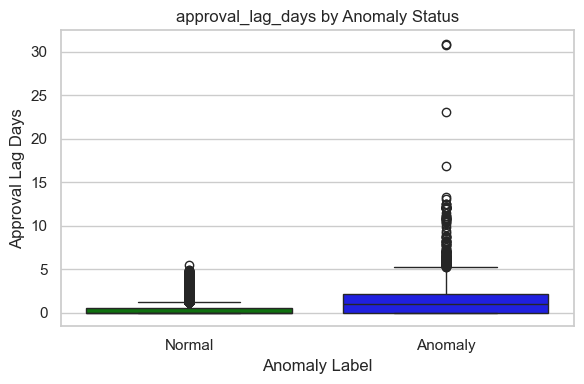

C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3620322894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


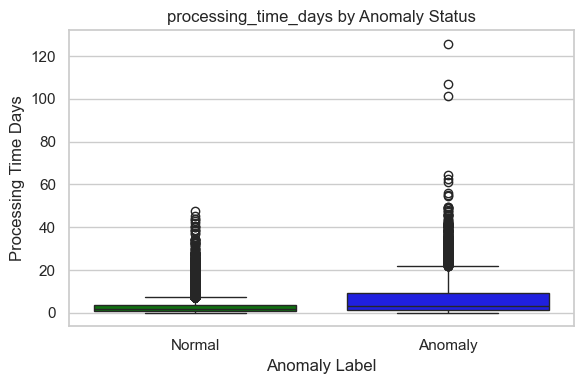

C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3620322894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


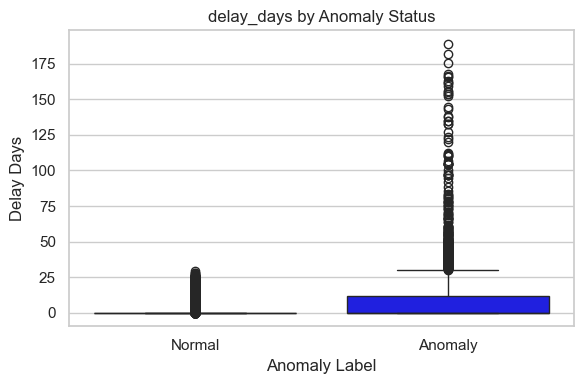

C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3620322894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


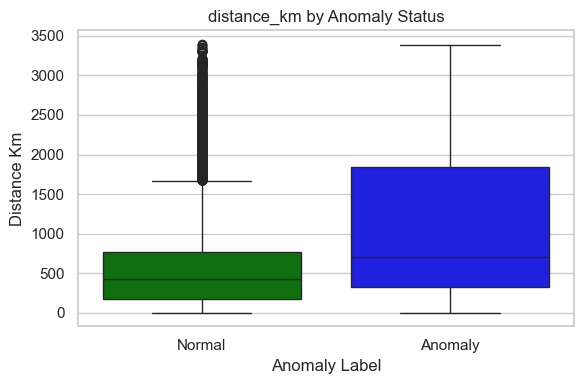

C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3620322894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


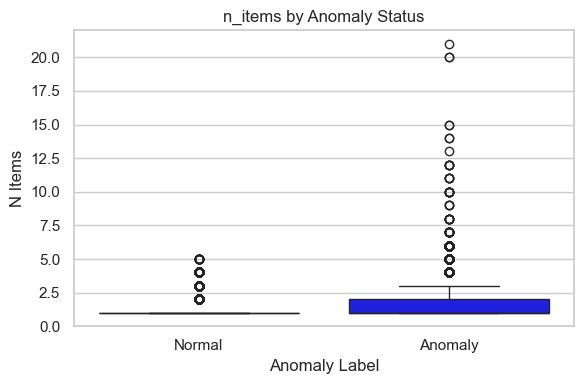

C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\3620322894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


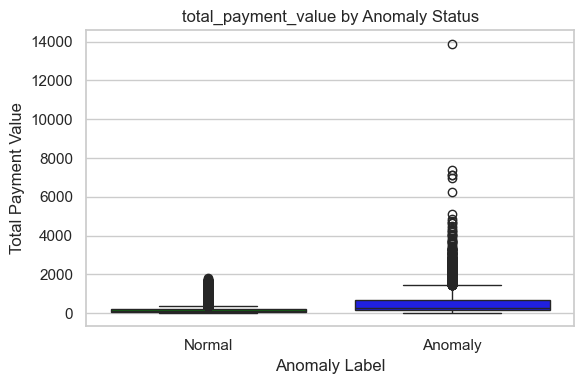

In [79]:
features_to_plot = [
    'approval_lag_days',
    'processing_time_days',
    'delay_days',
    'distance_km',
    'n_items',
    'total_payment_value'
]


sns.set(style="whitegrid")
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=valid_orders_df,
        x='anomaly_label_iso_forest',  
        y=feature,
        palette={'Normal': 'green', 'Anomaly': 'blue'}
    )
    plt.title(f'{feature} by Anomaly Status')
    plt.xlabel('Anomaly Label')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()


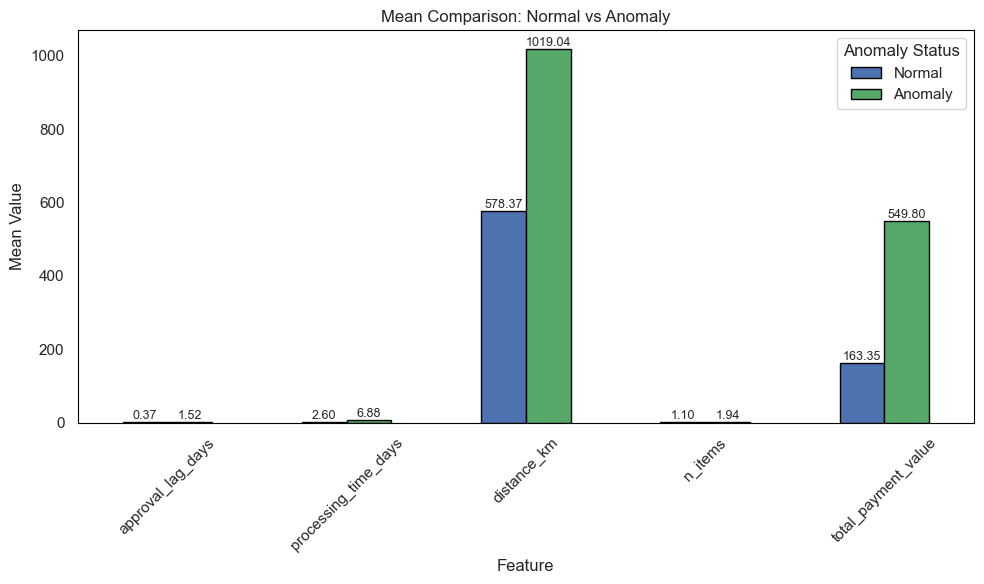

In [80]:
# Transpose for plotting
mean_stats = summary_stats.filter(like='_mean').T
mean_stats.index = [i.replace('_mean', '') for i in mean_stats.index]

# Plot
ax = mean_stats.plot(kind='bar', figsize=(10, 6),
                     color=['#4c72b0', '#55a868'],  
                     edgecolor='black') 

plt.title("Mean Comparison: Normal vs Anomaly")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(title='Anomaly Status')
plt.grid(False)  
plt.tight_layout()

# Adding bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()

plt.show()

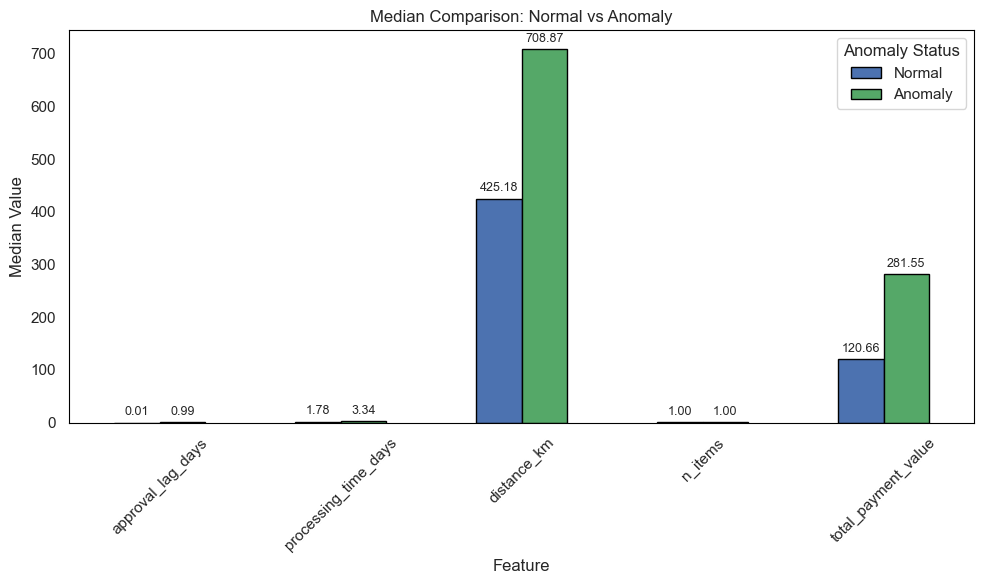

In [81]:
median_stats = summary_stats.filter(like='_median').T
median_stats.index = [i.replace('_median', '') for i in median_stats.index]

ax = median_stats.plot(kind='bar', figsize=(10, 6),  color=['#4c72b0', '#55a868'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

ax.set_title("Median Comparison: Normal vs Anomaly")
ax.set_ylabel("Median Value")
ax.set_xlabel("Feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Anomaly Status')
ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()


#### LOF

In [82]:
X = valid_orders_df[selected_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
# from sklearn.neighbors import LocalOutlierFactor

# # Try different settings
# configs = [
#     {'n_neighbors': 10, 'contamination': 0.03},
#     {'n_neighbors': 20, 'contamination': 0.05},  # original
#     {'n_neighbors': 35, 'contamination': 0.08}
# ]

# for config in configs:
#     lof = LocalOutlierFactor(n_neighbors=config['n_neighbors'],
#                              contamination=config['contamination'],
#                              novelty=False)
    
#     labels = lof.fit_predict(X_lof_scaled)
#     flag = (labels == -1).astype(int)

#     anomaly_count = flag.sum()
#     print(f"Neighbors: {config['n_neighbors']}, Contamination: {config['contamination']} → Anomalies: {anomaly_count}")

In [84]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=False)
lof_predictions = lof.fit_predict(X_scaled)  # -1 = anomaly, 1 = normal
lof_scores = -lof.negative_outlier_factor_  # Higher = more outlier

valid_orders_df = valid_orders_df.loc[X.index].copy()  
valid_orders_df['anomaly_lof'] = (lof_predictions == -1).astype(int)  # 1 = anomaly, 0 = normal
valid_orders_df['anomaly_score_lof'] = lof_scores
valid_orders_df['anomaly_label_lof'] = valid_orders_df['anomaly_lof'].map({0: 'Normal', 1: 'Anomaly'})

In [85]:
valid_orders_df['anomaly_lof'].value_counts()

anomaly_lof
0    91176
1     4799
Name: count, dtype: int64

In [86]:
# Filter only LOF-flagged anomalies (anomaly_lof == 1)
lof_anomalies = valid_orders_df[valid_orders_df['anomaly_lof'] == 1]

# Sort by LOF anomaly score (higher = more anomalous)
top_10_lof = lof_anomalies.sort_values(by='anomaly_score_lof', ascending=False).head(10)

# Columns to display
lof_display_columns = [
    'order_id','anomaly_label_lof', 'anomaly_score_lof', 'seller_city','seller_state','customer_city', 'customer_state', 'distance_km',
    'approval_lag_days', 'processing_time_days', 'delay_days',
    'n_items', 'total_payment_value'
]

top_10_lof_display = top_10_lof[lof_display_columns]

top_10_lof_display

,order_id,anomaly_label_lof,anomaly_score_lof,seller_city,seller_state,customer_city,customer_state,distance_km,approval_lag_days,processing_time_days,delay_days,n_items,total_payment_value
53773,f7923db0430587601c2aef15ec4b8af4,Anomaly,8.124110,votorantim,SP,jandaia do sul,PR,426.587519,30.768704,1.264792,15.628160,4,516.80
92897,0a93b40850d3f4becf2f276666e01340,Anomaly,8.024706,salto,SP,campo bom,RS,811.676362,30.893484,1.321366,7.942928,1,53.10
12950,03caa2c082116e1d31e67e9ae3700499,Anomaly,7.200585,sao paulo,SP,rio de janeiro,RJ,345.866049,3.002407,8.010382,0.000000,8,13888.16
35045,da81fbc27b55e0f3d2813cf2078dc780,Anomaly,5.827057,sao paulo,SP,rio das ostras,RJ,495.381293,0.012951,125.762569,100.013125,1,1811.70
85566,de0076b42a023f53b398ce9ab0d9009c,Anomaly,5.091110,franca,SP,teixeira de freitas,BA,869.007119,23.116042,2.052431,4.810359,1,51.48
7754,0b01066982af6f2681ea9b0169f0d987,Anomaly,4.843384,limeira,SP,belo horizonte,MG,459.722971,0.014792,1.044965,7.699317,3,184.28
33991,97f48024fcc76f1898e397ad6966e3a0,Anomaly,4.743955,sao paulo,SP,sao vicente,SP,39.519535,0.011389,107.053218,80.582060,1,1449.18
44747,b92b69bbda4e9c56848904c3f0cc14d9,Anomaly,4.586237,sao paulo,SP,sao paulo,SP,14.850993,0.013345,0.930486,0.701308,1,36.08
2974,8b7fd198ad184563c231653673e75a7f,Anomaly,4.547105,sao paulo,SP,sao caetano do sul,SP,19.682929,2.946215,101.361285,91.753565,1,66.31
79943,4e7474d49d1ef3688ffdd819f87f8322,Anomaly,4.352134,sao bernardo do campo,SP,guarulhos,SP,30.902785,0.007199,0.819109,0.636759,1,30.78


In [87]:
# # Check binning distribution
# valid_orders_df['approval_lag_bin'] = pd.qcut(valid_orders_df['approval_lag_days'], q=5, duplicates='drop')
# print(valid_orders_df.groupby('approval_lag_bin').size())

In [88]:
# Features to analyze
lof_features = [
    'approval_lag_days',
    'processing_time_days',
    'delay_days',
    'distance_km',
    'n_items',
    'total_payment_value'
]

# Computing mean and median by LOF label
lof_mean = valid_orders_df.groupby('anomaly_lof')[lof_features].mean().rename(index={0: 'Normal', 1: 'Anomaly'})
lof_median = valid_orders_df.groupby('anomaly_lof')[lof_features].median().rename(index={0: 'Normal', 1: 'Anomaly'})

# One summary DF
lof_summary_stats = pd.concat(
    [lof_mean.add_suffix('_mean'), lof_median.add_suffix('_median')],
    axis=1
)
lof_summary_stats

,approval_lag_days_mean,processing_time_days_mean,delay_days_mean,distance_km_mean,n_items_mean,total_payment_value_mean,approval_lag_days_median,processing_time_days_median,delay_days_median,distance_km_median,n_items_median,total_payment_value_median
anomaly_lof,,,,,,,,,,,,
Normal,0.418154,2.737779,0.687335,595.525628,1.131361,178.092286,0.013738,1.794913,0.0,433.008561,1.0,123.66
Anomaly,0.621385,4.273301,2.399937,693.143590,1.350281,269.695985,0.125556,2.464271,0.0,448.834663,1.0,136.40


In [89]:
lof_mean_with_suffix = lof_mean.add_suffix('_mean')
lof_mean_with_suffix

,approval_lag_days_mean,processing_time_days_mean,delay_days_mean,distance_km_mean,n_items_mean,total_payment_value_mean
anomaly_lof,,,,,,
Normal,0.418154,2.737779,0.687335,595.525628,1.131361,178.092286
Anomaly,0.621385,4.273301,2.399937,693.143590,1.350281,269.695985


In [90]:
lof_median_with_suffix = lof_median.add_suffix('_median')
lof_median_with_suffix

,approval_lag_days_median,processing_time_days_median,delay_days_median,distance_km_median,n_items_median,total_payment_value_median
anomaly_lof,,,,,,
Normal,0.013738,1.794913,0.0,433.008561,1.0,123.66
Anomaly,0.125556,2.464271,0.0,448.834663,1.0,136.40


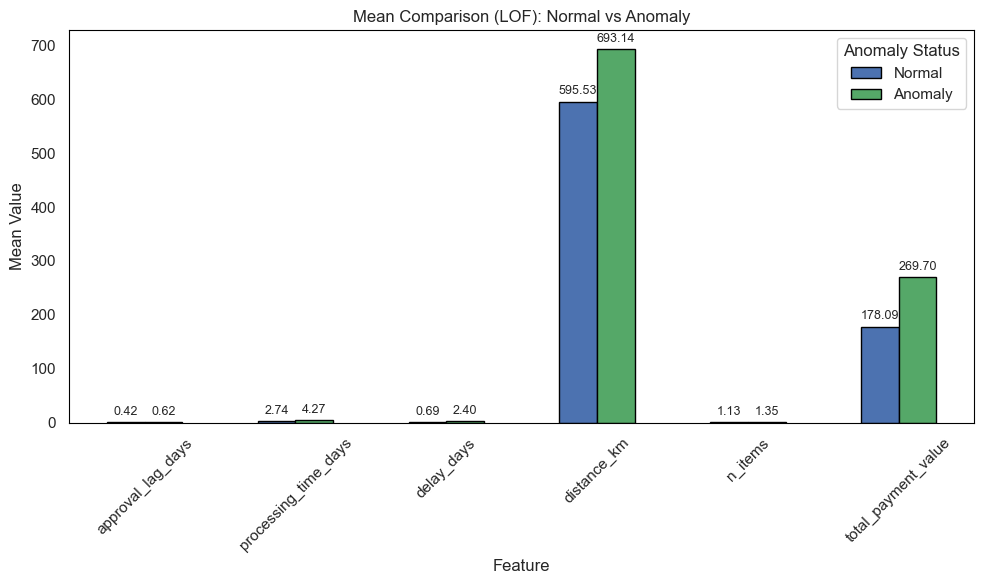

In [91]:
lof_mean_stats = lof_summary_stats.filter(like='_mean').T
lof_mean_stats.index = [i.replace('_mean', '') for i in lof_mean_stats.index]

# Plot
ax = lof_mean_stats.plot(kind='bar', figsize=(10, 6), color=['#4c72b0', '#55a868'], edgecolor='black')

# Bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

ax.set_title("Mean Comparison (LOF): Normal vs Anomaly")
ax.set_ylabel("Mean Value")
ax.set_xlabel("Feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Anomaly Status')
ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()


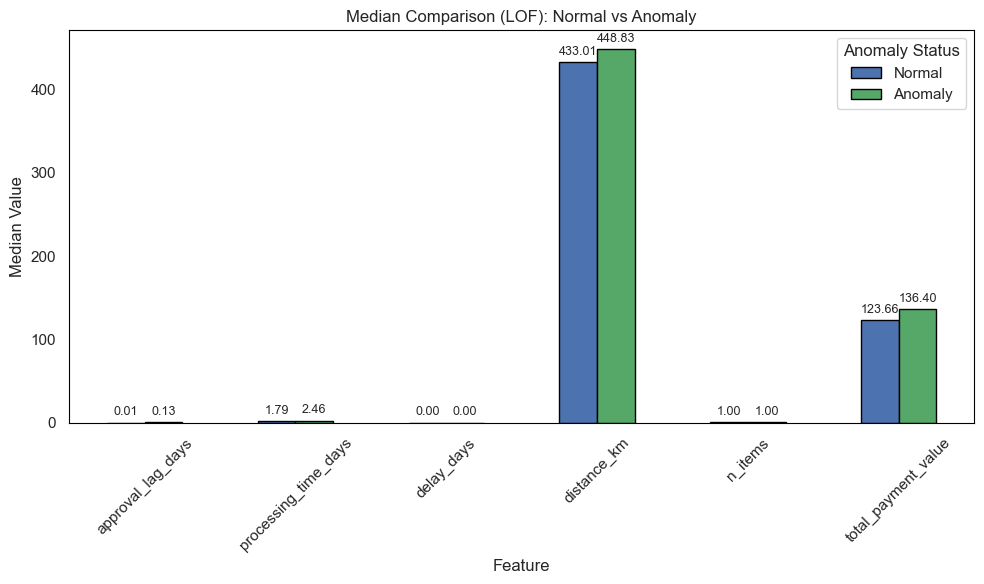

In [92]:
lof_median_stats = lof_summary_stats.filter(like='_median').T
lof_median_stats.index = [i.replace('_median', '') for i in lof_median_stats.index]

ax = lof_median_stats.plot(kind='bar', figsize=(10, 6),  color=['#4c72b0', '#55a868'], edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

ax.set_title("Median Comparison (LOF): Normal vs Anomaly")
ax.set_ylabel("Median Value")
ax.set_xlabel("Feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Anomaly Status')
ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()


#### One Class SVM

In [93]:
X = valid_orders_df[selected_features].fillna(valid_orders_df[selected_features].median())

In [94]:
# X_scaled = StandardScaler().fit_transform(X)

# gamma_list = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
# outlier_rates = []

# # Loop through gamma values
# for g in gamma_list:
#     svm = OneClassSVM(kernel='rbf', gamma=g, nu=0.05)
#     preds = svm.fit_predict(X_scaled)
#     outlier_rate = (preds == -1).mean()
#     outlier_rates.append(outlier_rate)

# # Plot
# plt.figure(figsize=(8, 5))
# plt.plot(gamma_list, outlier_rates, marker='o', color='#1f77b4')
# plt.xscale('log')
# plt.xlabel('Gamma (log scale)', fontsize=12)
# plt.ylabel('Outlier Rate (fraction of anomalies)', fontsize=12)
# plt.title('Effect of Gamma on SVM Outlier Detection', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

In [95]:
print(X.describe().T[['mean', 'std']])

                            mean         std
approval_lag_days       0.428316    0.855873
processing_time_days    2.814559    3.477375
delay_days              0.772969    4.752471
distance_km           600.406780  592.408157
n_items                 1.142308    0.539328
total_payment_value   182.672710  230.458235


In [96]:
idx = X.index

svm_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('svm', OneClassSVM(kernel='rbf', gamma=0.05, nu=0.05))
])

# Fitting the model
svm_pipe.fit(X)

# Transform and score
X_scaled = svm_pipe.named_steps['scale'].transform(X)
svm_scores_raw = svm_pipe.named_steps['svm'].decision_function(X_scaled)
svm_scores = -svm_scores_raw  # Flip sign: higher = more anomalous

# Predicting anomaly flags
svm_flags = svm_pipe.named_steps['svm'].predict(X_scaled)
svm_flags = (svm_flags == -1).astype(int)

valid_orders_df = valid_orders_df.loc[idx].copy()
valid_orders_df['anomaly_svm'] = svm_flags
valid_orders_df['anomaly_score_svm'] = svm_scores
valid_orders_df['anomaly_label_svm'] = valid_orders_df['anomaly_svm'].map({0: 'Normal', 1: 'Anomaly'})

print("SVM flagged anomaly rate:", valid_orders_df['anomaly_svm'].mean())
print("SVM score range:", pd.Series(svm_scores).describe())

SVM flagged anomaly rate: 0.05000260484501172
SVM score range: count    95975.000000
mean      -111.522293
std        102.678034
min       -345.378181
25%       -165.431709
50%       -122.216313
75%        -77.808438
max        787.444553
dtype: float64


In [97]:
print(valid_orders_df['anomaly_svm'].value_counts())

anomaly_svm
0    91176
1     4799
Name: count, dtype: int64


In [98]:
# Top 10 anomalous records
svm_anomalies = valid_orders_df[valid_orders_df['anomaly_svm'] == 1]
top_10_svm = svm_anomalies.sort_values(by='anomaly_score_svm', ascending=False).head(10)

top_10_svm_display = top_10_svm.copy()
top_10_svm_display['anomaly_label_svm'] = top_10_svm_display['anomaly_svm'].map({0: 'Normal', 1: 'Anomaly'})

svm_display_columns = [
                        'order_id', 'anomaly_label_svm', 'anomaly_score_svm',  'anomaly_svm',
                        'seller_city', 'seller_state', 'customer_city', 'customer_state', 'distance_km',
                        'approval_lag_days', 'processing_time_days', 'delay_days',
                        'n_items', 'total_payment_value'
]

top_10_svm_display = top_10_svm_display[svm_display_columns]
top_10_svm_display

,order_id,anomaly_label_svm,anomaly_score_svm,anomaly_svm,seller_city,seller_state,customer_city,customer_state,distance_km,approval_lag_days,processing_time_days,delay_days,n_items,total_payment_value
12950,03caa2c082116e1d31e67e9ae3700499,Anomaly,787.444553,1,sao paulo,SP,rio de janeiro,RJ,345.866049,3.002407,8.010382,0.000000,8,13888.16
85737,8272b63d03f5f79c56e9e4120aec44ef,Anomaly,787.419147,1,sao paulo,SP,sao paulo,SP,39.205331,1.004144,2.889236,3.752106,21,360.48
2974,8b7fd198ad184563c231653673e75a7f,Anomaly,787.381398,1,sao paulo,SP,sao caetano do sul,SP,19.682929,2.946215,101.361285,91.753565,1,66.31
85566,de0076b42a023f53b398ce9ab0d9009c,Anomaly,787.354992,1,franca,SP,teixeira de freitas,BA,869.007119,23.116042,2.052431,4.810359,1,51.48
35045,da81fbc27b55e0f3d2813cf2078dc780,Anomaly,787.354852,1,sao paulo,SP,rio das ostras,RJ,495.381293,0.012951,125.762569,100.013125,1,1811.70
33991,97f48024fcc76f1898e397ad6966e3a0,Anomaly,787.296187,1,sao paulo,SP,sao vicente,SP,39.519535,0.011389,107.053218,80.582060,1,1449.18
53773,f7923db0430587601c2aef15ec4b8af4,Anomaly,787.292964,1,votorantim,SP,jandaia do sul,PR,426.587519,30.768704,1.264792,15.628160,4,516.80
31203,2cc9089445046817a7539d90805e6e5a,Anomaly,787.284323,1,porto alegre,RS,divinopolis,MG,1265.589521,4.077905,7.955880,0.000000,6,6228.48
92897,0a93b40850d3f4becf2f276666e01340,Anomaly,787.279637,1,salto,SP,campo bom,RS,811.676362,30.893484,1.321366,7.942928,1,53.10
11016,47b40429ed8cce3aee9199792275433f,Anomaly,787.115893,1,sao paulo,SP,salto,SP,90.917671,0.032801,33.636956,175.869109,1,507.66


95th percentile anomaly score threshold: -0.00


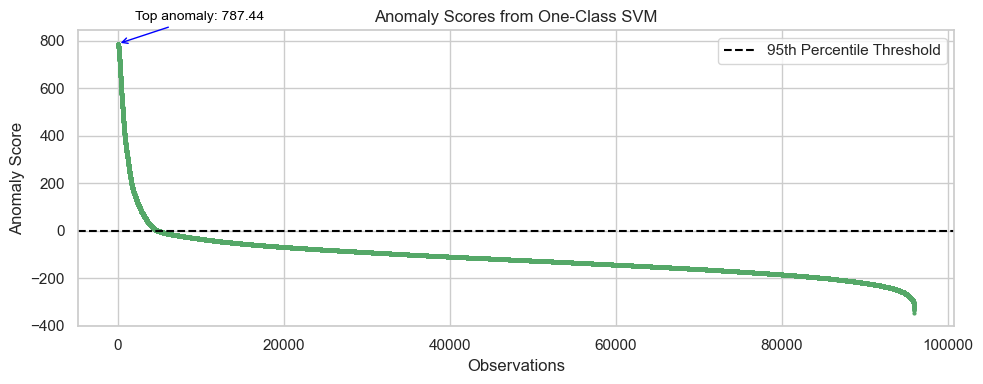

In [99]:
# 5% threshold
threshold_5pct = np.percentile(valid_orders_df['anomaly_score_svm'], 95)
print(f"95th percentile anomaly score threshold: {threshold_5pct:.2f}")

# Filter top outliers
top_outliers = valid_orders_df[valid_orders_df['anomaly_score_svm'] >= threshold_5pct]
top_outliers_sorted = top_outliers.sort_values(by='anomaly_score_svm', ascending=False)

# Sorted scores
sorted_scores = np.sort(valid_orders_df['anomaly_score_svm'])[::-1]  # descending order
top_idx = 0
top_score = sorted_scores[top_idx]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(sorted_scores, marker='o', linestyle='-', color='#55a868', markersize=2)
plt.axhline(y=threshold_5pct, color='black', linestyle='--', label='95th Percentile Threshold')
plt.annotate(f'Top anomaly: {top_score:.2f}',
             xy=(top_idx, top_score),
             xytext=(top_idx + 2000, top_score + 100),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='black')
plt.title('Anomaly Scores from One-Class SVM')
plt.xlabel('Observations')
plt.ylabel('Anomaly Score')
plt.legend()
plt.tight_layout()
plt.show()


In [100]:
# Grouped mean and median
svm_mean = valid_orders_df.groupby('anomaly_svm')[selected_features].mean().rename(index={0: 'Normal', 1: 'Anomaly'})
svm_median = valid_orders_df.groupby('anomaly_svm')[selected_features].median().rename(index={0: 'Normal', 1: 'Anomaly'})

svm_mean_with_suffix = svm_mean.add_suffix('_mean')
svm_median_with_suffix = svm_median.add_suffix('_median')

svm_mean_with_suffix

,approval_lag_days_mean,processing_time_days_mean,delay_days_mean,distance_km_mean,n_items_mean,total_payment_value_mean
anomaly_svm,,,,,,
Normal,0.385738,2.593207,0.399348,583.903773,1.103865,163.677804
Anomaly,1.237266,7.020011,7.871390,913.946716,1.872682,543.556124


In [101]:
svm_median_with_suffix

,approval_lag_days_median,processing_time_days_median,delay_days_median,distance_km_median,n_items_median,total_payment_value_median
anomaly_svm,,,,,,
Normal,0.014086,1.800683,0.0,429.871621,1.0,121.60
Anomaly,0.036458,2.329907,0.0,507.392816,1.0,228.48


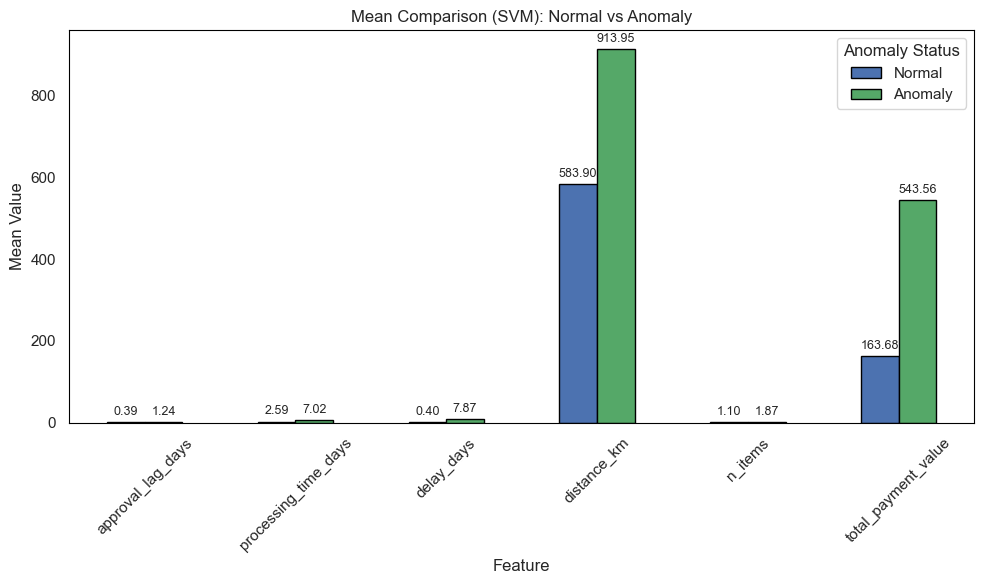

In [102]:
mean_stats = svm_mean_with_suffix.T
mean_stats.index = [i.replace('_mean', '') for i in mean_stats.index]

ax = mean_stats.plot(kind='bar', figsize=(10, 6),  color=['#4c72b0', '#55a868'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

ax.set_title("Mean Comparison (SVM): Normal vs Anomaly")
ax.set_ylabel("Mean Value")
ax.set_xlabel("Feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Anomaly Status')
ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()


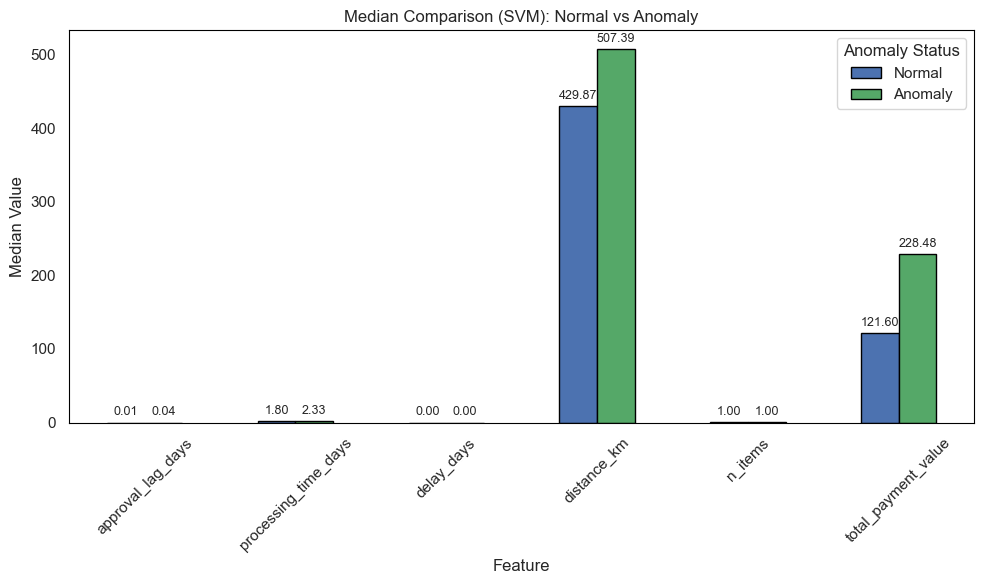

In [103]:
median_stats = svm_median_with_suffix.T
median_stats.index = [i.replace('_median', '') for i in median_stats.index]

ax = median_stats.plot(kind='bar', figsize=(10, 6),  color=['#4c72b0', '#55a868'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

ax.set_title("Median Comparison (SVM): Normal vs Anomaly")
ax.set_ylabel("Median Value")
ax.set_xlabel("Feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Anomaly Status')
ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()


#### Model Explainability

#### SHAP for Isolation Forest

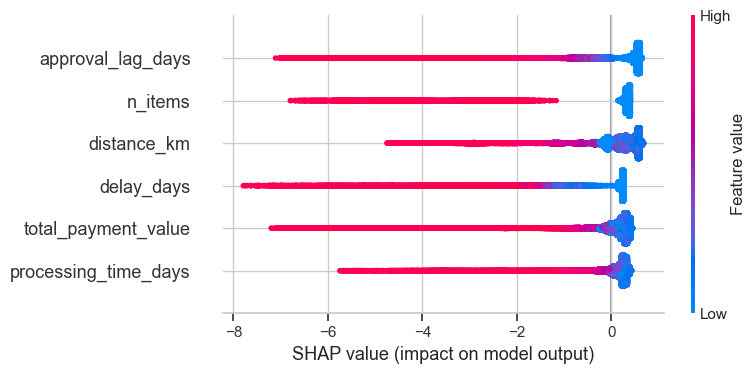

,SHAP Mean (abs),SHAP Std
approval_lag_days,0.717566,1.063056
n_items,0.649394,1.134945
distance_km,0.530698,0.868387
delay_days,0.443160,0.951424
total_payment_value,0.388132,0.773808
processing_time_days,0.372730,0.729879


In [104]:
isoforest = IsolationForest(contamination=0.05, random_state=42)
isoforest.fit(X_scaled)

#  SHAP Explainer
explainer = shap.TreeExplainer(isoforest)
shap_values = explainer.shap_values(X_scaled) 

# SHAP Beeswarm Plot
shap.summary_plot(shap_values, features=X_scaled, feature_names=selected_features)

# Summary Table (mean and std of SHAP values per feature)
shap_summary_df = pd.DataFrame(shap_values, columns=selected_features)
shap_stats = pd.DataFrame({
    'SHAP Mean (abs)': shap_summary_df.abs().mean(),
    'SHAP Std': shap_summary_df.std()
}).sort_values(by='SHAP Mean (abs)', ascending=False)
shap_stats


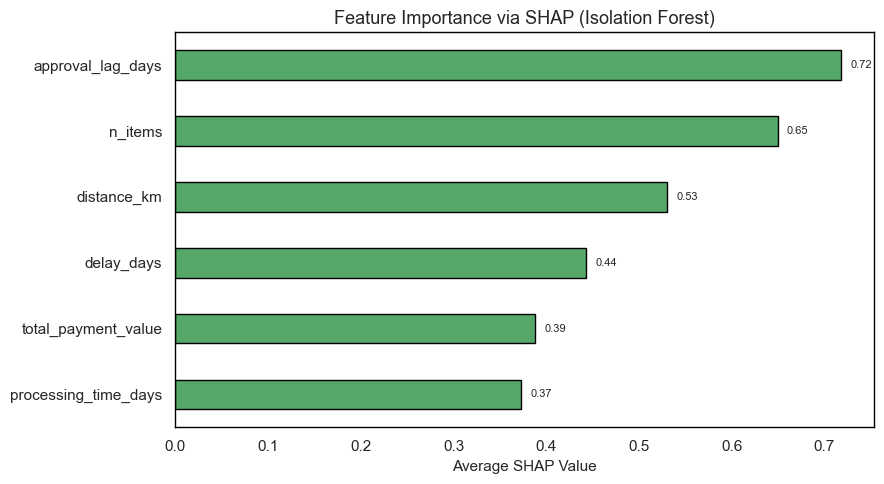

In [105]:
# Computing absolute SHAP values and mean importance
shap_abs = np.abs(shap_values)  
mean_abs_shap = shap_abs.mean(axis=0)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values(by='Mean_Abs_SHAP', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(9, 5), facecolor='white')  

bars = ax.barh(
    importance_df['Feature'],
    importance_df['Mean_Abs_SHAP'],
    height=0.45,                   
    color='#55a868',              
    edgecolor='black'
)

# Labels and title
ax.set_xlabel('Average SHAP Value', fontsize=11)
ax.set_title('Feature Importance via SHAP (Isolation Forest)', fontsize=13)

ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()


#### LIME for LOF

C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


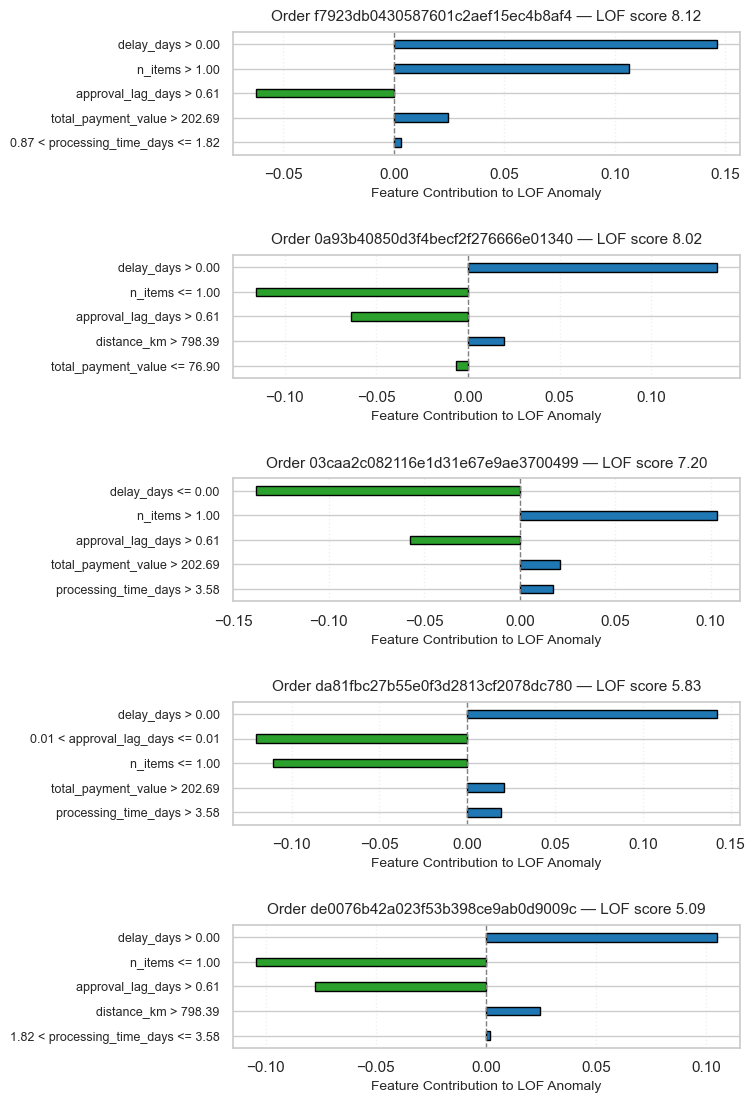

,order_id,lof_score,feature_1,weight_1,feature_2,weight_2,feature_3,weight_3,feature_4,weight_4,feature_5,weight_5
0,f7923db0430587601c2aef15ec4b8af4,8.124110,delay_days > 0.00,0.1462,n_items > 1.00,0.1065,approval_lag_days > 0.61,-0.0623,total_payment_value > 202.69,0.0244,0.87 < processing_time_days <= 1.82,0.0033
1,0a93b40850d3f4becf2f276666e01340,8.024706,delay_days > 0.00,0.1358,n_items <= 1.00,-0.1156,approval_lag_days > 0.61,-0.0636,distance_km > 798.39,0.0197,total_payment_value <= 76.90,-0.0066
2,03caa2c082116e1d31e67e9ae3700499,7.200585,delay_days <= 0.00,-0.1381,n_items > 1.00,0.1032,approval_lag_days > 0.61,-0.0576,total_payment_value > 202.69,0.0210,processing_time_days > 3.58,0.0174
3,da81fbc27b55e0f3d2813cf2078dc780,5.827057,delay_days > 0.00,0.1422,0.01 < approval_lag_days <= 0.01,-0.1202,n_items <= 1.00,-0.1108,total_payment_value > 202.69,0.0211,processing_time_days > 3.58,0.0193
4,de0076b42a023f53b398ce9ab0d9009c,5.091110,delay_days > 0.00,0.1049,n_items <= 1.00,-0.1043,approval_lag_days > 0.61,-0.0774,distance_km > 798.39,0.0248,1.82 < processing_time_days <= 3.58,0.0020


In [106]:
# Train surrogate model on LOF
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, valid_orders_df['anomaly_lof'])

# LIME setup
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.tolist(),
    class_names=['Normal', 'Anomaly'],
    mode='classification',
    discretize_continuous=True
)

#  Fetching top 5 anomalies
top5_df = valid_orders_df.sort_values(by='anomaly_score_lof', ascending=False).head(5)
top5_indices = top5_df.index

# Extract explanations and store
summary_rows = []

for i, idx in enumerate(top5_indices, start=1):
    instance = X.loc[idx]
    order_id = valid_orders_df.loc[idx, 'order_id']
    lof_score = valid_orders_df.loc[idx, 'anomaly_score_lof']
    
    exp = explainer.explain_instance(
        data_row=instance.values,
        predict_fn=clf.predict_proba,
        num_features=5
    )
    
    explanation_data = exp.as_list()
    
    row = {
        'order_id': order_id,
        'lof_score': lof_score
    }
    
    for j, (feat, weight) in enumerate(explanation_data, start=1):
        row[f'feature_{j}'] = feat
        row[f'weight_{j}'] = round(weight, 4)
    
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)

# Plot
n = len(summary_df)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, n * 2.3), facecolor='white')
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, summary_df.iterrows()):
    features = [row[f'feature_{j}'] for j in range(1, 6)]
    weights = [row[f'weight_{j}'] for j in range(1, 6)]
    y_pos = list(range(len(features)))[::-1]  # Top to bottom

    colors = ['#1f77b4' if w >= 0 else '#2ca02c' for w in weights]

    ax.barh(
        y=y_pos,
        width=weights,
        height=0.35,
        color=colors,
        edgecolor='black'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.axvline(0, color='gray', linewidth=1, linestyle='--')
    ax.set_ylim(-0.5, len(features) - 0.5)

    ax.set_title(
        f"Order {row['order_id']} — LOF score {row['lof_score']:.2f}",
        fontsize=11,
        pad=8
    )

    ax.set_xlabel("Feature Contribution to LOF Anomaly", fontsize=10)
    ax.grid(axis='x', linestyle=':', alpha=0.3)
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout(pad=2)
plt.show()

display(summary_df)

In [107]:
summary_df

,order_id,lof_score,feature_1,weight_1,feature_2,weight_2,feature_3,weight_3,feature_4,weight_4,feature_5,weight_5
0,f7923db0430587601c2aef15ec4b8af4,8.124110,delay_days > 0.00,0.1462,n_items > 1.00,0.1065,approval_lag_days > 0.61,-0.0623,total_payment_value > 202.69,0.0244,0.87 < processing_time_days <= 1.82,0.0033
1,0a93b40850d3f4becf2f276666e01340,8.024706,delay_days > 0.00,0.1358,n_items <= 1.00,-0.1156,approval_lag_days > 0.61,-0.0636,distance_km > 798.39,0.0197,total_payment_value <= 76.90,-0.0066
2,03caa2c082116e1d31e67e9ae3700499,7.200585,delay_days <= 0.00,-0.1381,n_items > 1.00,0.1032,approval_lag_days > 0.61,-0.0576,total_payment_value > 202.69,0.0210,processing_time_days > 3.58,0.0174
3,da81fbc27b55e0f3d2813cf2078dc780,5.827057,delay_days > 0.00,0.1422,0.01 < approval_lag_days <= 0.01,-0.1202,n_items <= 1.00,-0.1108,total_payment_value > 202.69,0.0211,processing_time_days > 3.58,0.0193
4,de0076b42a023f53b398ce9ab0d9009c,5.091110,delay_days > 0.00,0.1049,n_items <= 1.00,-0.1043,approval_lag_days > 0.61,-0.0774,distance_km > 798.39,0.0248,1.82 < processing_time_days <= 3.58,0.0020


In [108]:
### Binning

In [109]:
# Define bin first 
bins = [-0.001, 0.01, 0.05, 0.25, 1, 3, 7, 15, 30, valid_orders_df['approval_lag_days'].max()]
labels = [f'bin{i}' for i in range(len(bins) - 1)]
valid_orders_df['approval_lag_bin'] = pd.cut(valid_orders_df['approval_lag_days'], bins=bins, labels=labels)

# Ordinal encode bin for model input
ordinal_encoder = OrdinalEncoder()
valid_orders_df['approval_lag_bin_encoded'] = ordinal_encoder.fit_transform(
    valid_orders_df[['approval_lag_bin']].astype(str)
)

# Add to feature set
X = X.copy()
X['approval_lag_bin_encoded'] = valid_orders_df['approval_lag_bin_encoded']


In [110]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, valid_orders_df['anomaly_lof'])


RandomForestClassifier(random_state=42)

In [111]:

feature_names = X.columns.tolist()
categorical_features = [feature_names.index('approval_lag_bin_encoded')]
categorical_names = {
    feature_names.index('approval_lag_bin_encoded'): ordinal_encoder.categories_[0].tolist()
}

explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=feature_names,
    class_names=['Normal', 'Anomaly'],
    categorical_features=categorical_features,
    categorical_names=categorical_names,
    mode='classification',
    discretize_continuous=True
)


In [112]:
def clean_lime_rule(rule_str):
    """
    Fix invalid rule strings from LIME, like '0.01 < x <= 0.01' → 'x == 0.01'
    """
    match = re.match(r'([0-9.]+) < (.+) <= ([0-9.]+)', rule_str)
    if match:
        low, feature, high = match.groups()
        if float(low) == float(high):
            return f"{feature} == {low}"
    return rule_str

C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


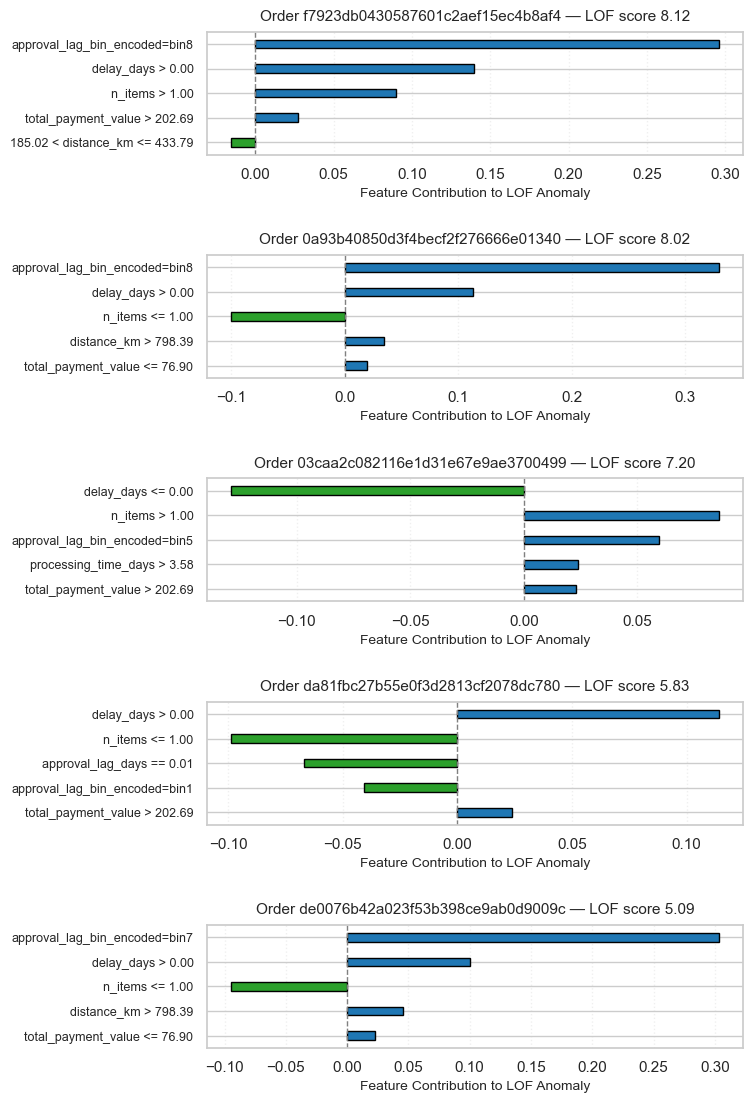

,order_id,lof_score,feature_1,weight_1,feature_2,weight_2,feature_3,weight_3,feature_4,weight_4,feature_5,weight_5
0,f7923db0430587601c2aef15ec4b8af4,8.124110,approval_lag_bin_encoded=bin8,0.2959,delay_days > 0.00,0.1394,n_items > 1.00,0.0895,total_payment_value > 202.69,0.0274,185.02 < distance_km <= 433.79,-0.0155
1,0a93b40850d3f4becf2f276666e01340,8.024706,approval_lag_bin_encoded=bin8,0.3296,delay_days > 0.00,0.1126,n_items <= 1.00,-0.1003,distance_km > 798.39,0.0345,total_payment_value <= 76.90,0.0194
2,03caa2c082116e1d31e67e9ae3700499,7.200585,delay_days <= 0.00,-0.1290,n_items > 1.00,0.0860,approval_lag_bin_encoded=bin5,0.0595,processing_time_days > 3.58,0.0241,total_payment_value > 202.69,0.0229
3,da81fbc27b55e0f3d2813cf2078dc780,5.827057,delay_days > 0.00,0.1141,n_items <= 1.00,-0.0988,approval_lag_days == 0.01,-0.0671,approval_lag_bin_encoded=bin1,-0.0407,total_payment_value > 202.69,0.0238
4,de0076b42a023f53b398ce9ab0d9009c,5.091110,approval_lag_bin_encoded=bin7,0.3033,delay_days > 0.00,0.1001,n_items <= 1.00,-0.0947,distance_km > 798.39,0.0453,total_payment_value <= 76.90,0.0228


In [113]:
# Fetch top 5 anomalies
top5_df = valid_orders_df.sort_values(by='anomaly_score_lof', ascending=False).head(5)
top5_indices = top5_df.index

summary_rows = []

for idx in top5_indices:
    instance = X.loc[idx]
    order_id = valid_orders_df.loc[idx, 'order_id']
    lof_score = valid_orders_df.loc[idx, 'anomaly_score_lof']

    exp = explainer.explain_instance(
        data_row=instance.values,
        predict_fn=clf.predict_proba,
        num_features=5
    )

    explanation_data = exp.as_list()

    row = {
        'order_id': order_id,
        'lof_score': lof_score
    }

    for j, (feat, weight) in enumerate(explanation_data, start=1):
        row[f'feature_{j}'] = clean_lime_rule(feat)
        row[f'weight_{j}'] = round(weight, 4)

    summary_rows.append(row)

# Plot
summary_df = pd.DataFrame(summary_rows)

n = len(summary_df)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, n * 2.3), facecolor='white')
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, summary_df.iterrows()):
    features = [row[f'feature_{j}'] for j in range(1, 6)]
    weights = [row[f'weight_{j}'] for j in range(1, 6)]
    y_pos = list(range(len(features)))[::-1]

    colors = ['#1f77b4' if w >= 0 else '#2ca02c' for w in weights]

    ax.barh(
        y=y_pos,
        width=weights,
        height=0.35,
        color=colors,
        edgecolor='black'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.axvline(0, color='gray', linewidth=1, linestyle='--')
    ax.set_ylim(-0.5, len(features) - 0.5)

    ax.set_title(
        f"Order {row['order_id']} — LOF score {row['lof_score']:.2f}",
        fontsize=11,
        pad=8
    )

    ax.set_xlabel("Feature Contribution to LOF Anomaly", fontsize=10)
    ax.grid(axis='x', linestyle=':', alpha=0.3)
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout(pad=2)
plt.show()

display(summary_df)


#### LIME for SVM

C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


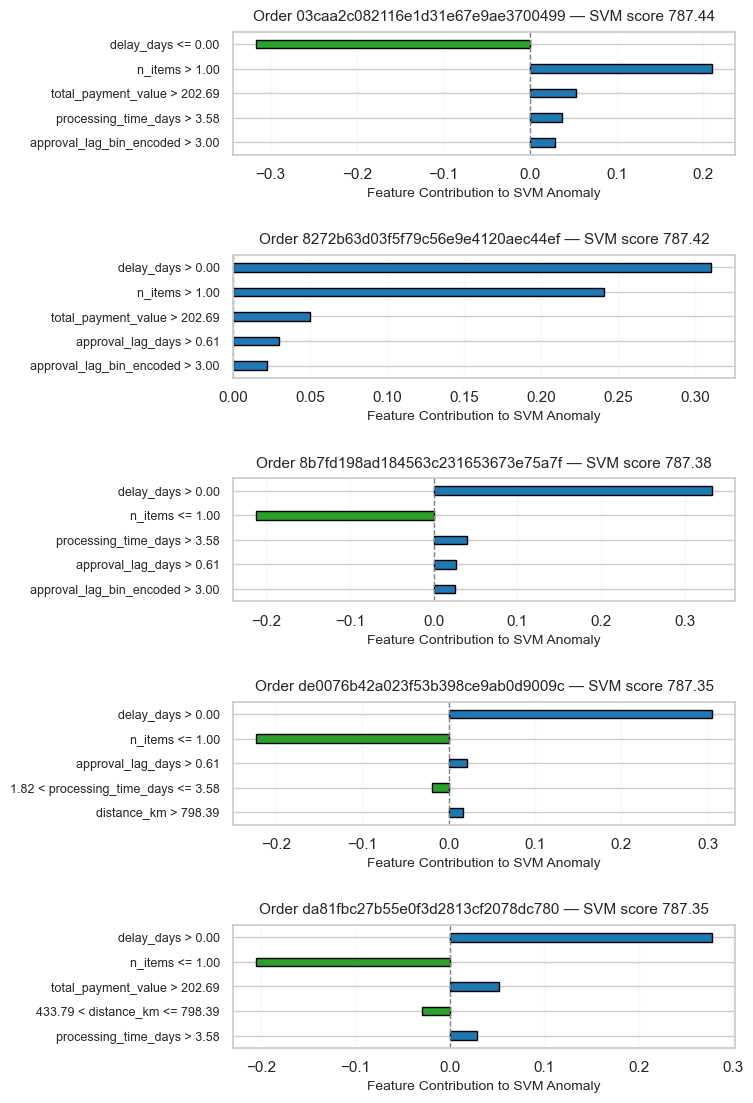

In [114]:
# Surrogate model for SVM
svm_flags = valid_orders_df['anomaly_svm']
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, svm_flags)

# LIME setup
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.tolist(),
    class_names=['Normal', 'Anomaly'],
    mode='classification',
    discretize_continuous=True
)

#  Get top 5 anomalies by SVM score
top5_df = valid_orders_df.sort_values(by='anomaly_score_svm', ascending=False).head(5)
top5_indices = top5_df.index

#  Generating LIME explanations 
summary_rows = []

for i, idx in enumerate(top5_indices, start=1):
    instance = X.loc[idx]
    order_id = valid_orders_df.loc[idx, 'order_id']
    anomaly_score = valid_orders_df.loc[idx, 'anomaly_score_svm']
    
    exp = explainer.explain_instance(
        data_row=instance.values,
        predict_fn=clf.predict_proba,
        num_features=5
    )
    
    explanation_data = exp.as_list()
    
    row = {
        'order_id': order_id,
        'svm_score': anomaly_score
    }
    
    for j, (feat, weight) in enumerate(explanation_data, start=1):
        row[f'feature_{j}'] = feat
        row[f'weight_{j}'] = weight
    
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)

# Plot
n = len(summary_df)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, n * 2.3), facecolor='white')
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, summary_df.iterrows()):
    features = [row[f'feature_{j}'] for j in range(1, 6)]
    weights = [row[f'weight_{j}'] for j in range(1, 6)]
    y_pos = list(range(len(features)))[::-1] 

    colors = ['#1f77b4' if w >= 0 else '#2ca02c' for w in weights]

    ax.barh(
        y=y_pos,
        width=weights,
        height=0.35,
        color=colors,
        edgecolor='black'
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.axvline(0, color='gray', linewidth=1, linestyle='--')
    ax.set_ylim(-0.5, len(features) - 0.5)

    ax.set_title(
        f"Order {row['order_id']} — SVM score {row['svm_score']:.2f}",
        fontsize=11,
        pad=8
    )

    ax.set_xlabel("Feature Contribution to SVM Anomaly", fontsize=10)
    ax.grid(axis='x', linestyle=':', alpha=0.3)
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout(pad=2)
plt.show()

In [115]:
summary_df

,order_id,svm_score,feature_1,weight_1,feature_2,weight_2,feature_3,weight_3,feature_4,weight_4,feature_5,weight_5
0,03caa2c082116e1d31e67e9ae3700499,787.444553,delay_days <= 0.00,-0.316924,n_items > 1.00,0.210701,total_payment_value > 202.69,0.053323,processing_time_days > 3.58,0.036440,approval_lag_bin_encoded > 3.00,0.028654
1,8272b63d03f5f79c56e9e4120aec44ef,787.419147,delay_days > 0.00,0.310377,n_items > 1.00,0.240812,total_payment_value > 202.69,0.049952,approval_lag_days > 0.61,0.029636,approval_lag_bin_encoded > 3.00,0.021822
2,8b7fd198ad184563c231653673e75a7f,787.381398,delay_days > 0.00,0.332875,n_items <= 1.00,-0.212383,processing_time_days > 3.58,0.040069,approval_lag_days > 0.61,0.027190,approval_lag_bin_encoded > 3.00,0.025439
3,de0076b42a023f53b398ce9ab0d9009c,787.354992,delay_days > 0.00,0.305049,n_items <= 1.00,-0.222929,approval_lag_days > 0.61,0.021221,1.82 < processing_time_days <= 3.58,-0.019208,distance_km > 798.39,0.016441
4,da81fbc27b55e0f3d2813cf2078dc780,787.354852,delay_days > 0.00,0.277864,n_items <= 1.00,-0.205671,total_payment_value > 202.69,0.051759,433.79 < distance_km <= 798.39,-0.030020,processing_time_days > 3.58,0.029005


In [116]:
# from sklearn.svm import OneClassSVM
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Assume X is your feature matrix
# svm_pipe = Pipeline([
#     ('scale', StandardScaler()),
#     ('svm', OneClassSVM(kernel='rbf', gamma=0.05, nu=0.05))
# ])

# svm_pipe.fit(X)
# scores = -svm_pipe.named_steps['svm'].decision_function(svm_pipe.named_steps['scale'].transform(X))
# flags = (svm_pipe.named_steps['svm'].predict(svm_pipe.named_steps['scale'].transform(X)) == -1).astype(int)
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X, flags)
# import shap

# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X)

# # Use class 1 (anomaly class)
# shap_values_class1 = shap_values[1]
# shap.summary_plot(shap_values_class1, X, plot_type="bar")
# shap.summary_plot(shap_values_class1, X)


#### Model Comparison

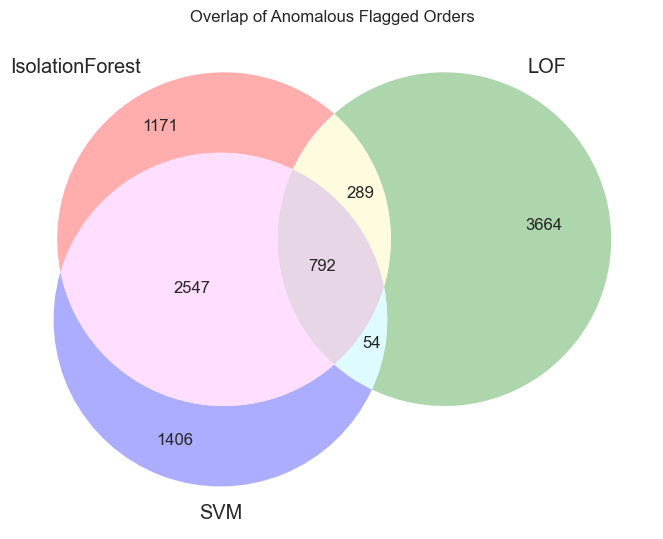

In [117]:
iso_set = set(valid_orders_df[valid_orders_df['anomaly_iso_forest'] == 1].index)
lof_set = set(valid_orders_df[valid_orders_df['anomaly_lof'] == 1].index)
svm_set = set(valid_orders_df[valid_orders_df['anomaly_svm'] == 1].index)

# Plot with custom bright/dark colors
plt.figure(figsize=(7, 6))
venn3(
    [iso_set, lof_set, svm_set],
    set_labels=('IsolationForest', 'LOF', 'SVM'),
    set_colors=['#ff9999', '#99cc99', '#9999ff'],  
    alpha=0.8
)
plt.title("Overlap of Anomalous Flagged Orders")
plt.tight_layout()
plt.show()


In [118]:
valid_orders_df['rule_any_anomaly_label'].value_counts()

rule_any_anomaly_label
Normal     77227
Anomaly    18748
Name: count, dtype: int64

In [119]:
valid_orders_df['rule_any_anomaly_flag'] = valid_orders_df['rule_any_anomaly'].map({False: 0, True: 1})
valid_orders_df['rule_any_anomaly_label'] = valid_orders_df['rule_any_anomaly_flag'].map({0: 'Normal', 1: 'Anomaly'})

# Attach record counts based on Anomaly_Flag
def attach_counts(summary_df, flag_col):
    counts = valid_orders_df[flag_col].value_counts(dropna=False).to_dict()

    def get_count(flag_label):
        if flag_label == 'Normal':
            return counts.get(0, counts.get(False, 0))
        elif flag_label == 'Anomaly':
            return counts.get(1, counts.get(True, 0))
        else:
            return 0

    summary_df['Record_Count'] = summary_df['Anomaly_Flag'].map(get_count)
    return summary_df

def summarize_group_medians(df, flag_col, method_label):
    grouped = df.groupby(flag_col)[selected_features].median().reset_index()

    flag_values = grouped[flag_col].unique()
    if set(flag_values) <= {0, 1}:
        mapping = {0: 'Normal', 1: 'Anomaly'}
    elif set(flag_values) <= {False, True}:
        mapping = {False: 'Normal', True: 'Anomaly'}
    else:
        raise ValueError(f"Unexpected values in {flag_col}: {flag_values}")

    grouped['Anomaly_Flag'] = grouped[flag_col].map(mapping)
    grouped = grouped.drop(columns=[flag_col])
    grouped['Method'] = method_label
    return grouped

# Defining methods and flags
methods = {
    'rule_any_anomaly_flag': 'Rule and Statistical-Based',
    'anomaly_iso_forest': 'ML - Isolation Forest',
    'anomaly_lof': 'ML - LOF',
    'anomaly_svm': 'ML - One-Class SVM'
}

summary_tables = []
for flag_col, label in methods.items():
    if flag_col in valid_orders_df.columns:
        df = summarize_group_medians(valid_orders_df, flag_col, label)
        df = attach_counts(df, flag_col)
        summary_tables.append(df)

median_summary_wide = pd.concat(summary_tables, ignore_index=True)
cols = ['Method', 'Anomaly_Flag', 'Record_Count'] + selected_features
median_summary_wide = median_summary_wide[cols]

median_summary_wide

,Method,Anomaly_Flag,Record_Count,approval_lag_days,processing_time_days,delay_days,distance_km,n_items,total_payment_value
0,Rule and Statistical-Based,Normal,77227,0.012616,1.820000,0.0,380.482515,1.0,119.43
1,Rule and Statistical-Based,Anomaly,18748,1.204745,1.793519,0.0,891.383439,1.0,144.13
2,ML - Isolation Forest,Normal,91176,0.013843,1.780851,0.0,425.184528,1.0,120.66
3,ML - Isolation Forest,Anomaly,4799,0.994803,3.342801,0.0,708.865924,1.0,281.55
4,ML - LOF,Normal,91176,0.013738,1.794913,0.0,433.008561,1.0,123.66
5,ML - LOF,Anomaly,4799,0.125556,2.464271,0.0,448.834663,1.0,136.40
6,ML - One-Class SVM,Normal,91176,0.014086,1.800683,0.0,429.871621,1.0,121.60
7,ML - One-Class SVM,Anomaly,4799,0.036458,2.329907,0.0,507.392816,1.0,228.48


#### Cities/State With Anomalus deliveries

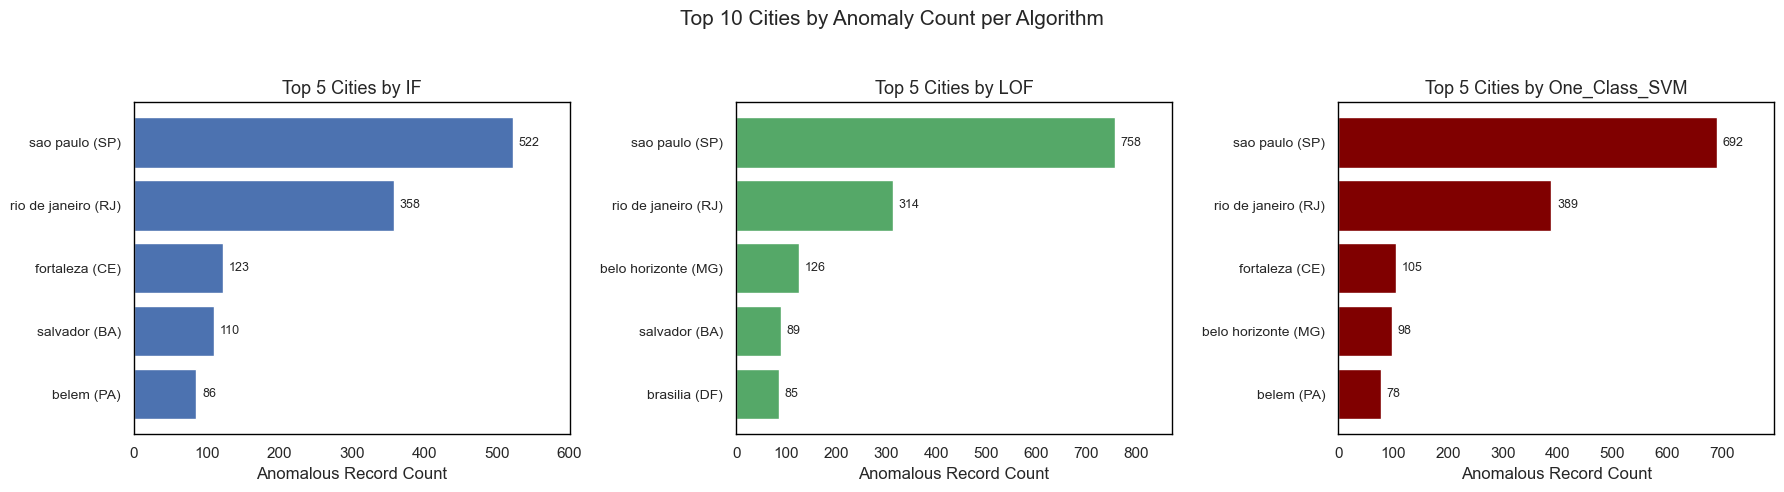

In [120]:
# Creating 'city_state' column
valid_orders_df['city_state'] = valid_orders_df['customer_city'] + ' (' + valid_orders_df['customer_state'] + ')'

# Defining models and colors
models = {
    'IF': ('anomaly_iso_forest', '#4c72b0'),     
    'LOF': ('anomaly_lof', '#55a868'),             
    'One_Class_SVM':('anomaly_svm', '#800000')
}


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor='white')

for ax, (model_label, (col, color)) in zip(axes, models.items()):
    if col in valid_orders_df.columns:
        df_model = valid_orders_df[valid_orders_df[col] == 1]
        top10 = df_model['city_state'].value_counts().head(5).sort_values(ascending=False)
        
        bars = ax.barh(
            top10.index,
            top10.values,
            color=color
        )
        
        ax.set_title(f'Top 5 Cities by {model_label}', fontsize=13)
        ax.set_xlabel('Anomalous Record Count')
        ax.set_yticks(range(len(top10)))
        ax.set_yticklabels(top10.index, fontsize=10)
        ax.invert_yaxis()
        
        xmax = top10.values.max()
        ax.set_xlim(right=xmax * 1.15)
        
        # Adding bar labels
        for bar in bars:
            width = bar.get_width()
            ax.text(width + xmax * 0.015, bar.get_y() + bar.get_height() / 2,
                    f'{int(width)}', va='center', fontsize=9)
        
       
        ax.grid(False)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1)


fig.suptitle('Top 10 Cities by Anomaly Count per Algorithm', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [121]:
# Combining the flags for ensemble analysis
valid_orders_df['combined_flag_count'] = (
    valid_orders_df['anomaly_iso_forest'] +
    valid_orders_df['anomaly_lof'] +
    valid_orders_df['anomaly_svm']
)

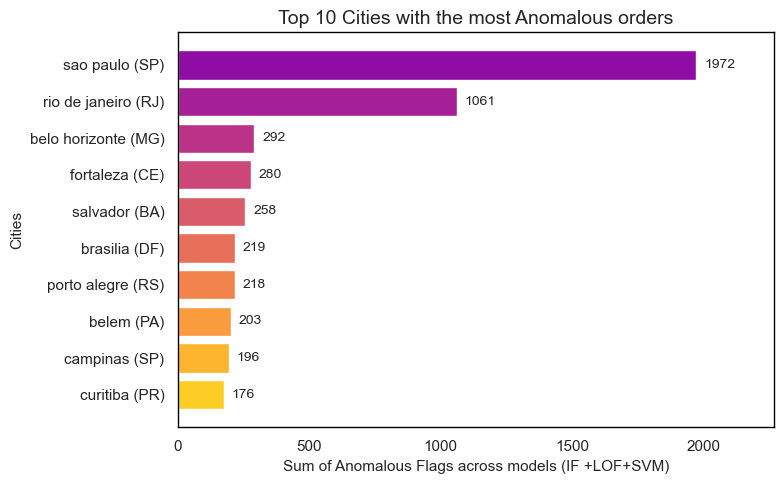

,City (State),Combined Flag Sum
0,sao paulo (SP),1972
1,rio de janeiro (RJ),1061
2,belo horizonte (MG),292
3,fortaleza (CE),280
4,salvador (BA),258
5,brasilia (DF),219
6,porto alegre (RS),218
7,belem (PA),203
8,campinas (SP),196
9,curitiba (PR),176


In [122]:
city_state_df = valid_orders_df.copy()

# Finding top customer cities and states with most anomalous deliveries
city_state_df['city_state'] = city_state_df['customer_city'] + ' (' + city_state_df['customer_state'] + ')'

combined_counts_city = (
    city_state_df.groupby('city_state')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

top10_city = combined_counts_city.head(10).reset_index()
top10_city.columns = ['City (State)', 'Combined Flag Sum']

# Plot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    top10_city['City (State)'],
    top10_city['Combined Flag Sum'],
    color=plt.cm.plasma(np.linspace(0.3, 0.9, len(top10_city)))
)
ax.invert_yaxis()
ax.set_title('Top 10 Cities with the most Anomalous orders', fontsize=14)
ax.set_xlabel('Sum of Anomalous Flags across models (IF +LOF+SVM)', fontsize=11)
ax.set_ylabel('Cities', fontsize=11)
xmax = top10_city['Combined Flag Sum'].max()
ax.set_xlim(right=xmax * 1.15)
ax.grid(False)
for bar in bars:
    width = bar.get_width()
    ax.text(width + xmax * 0.015, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

display(top10_city)


C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\1693143567.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_df.groupby('delay_bin')['combined_flag_count']


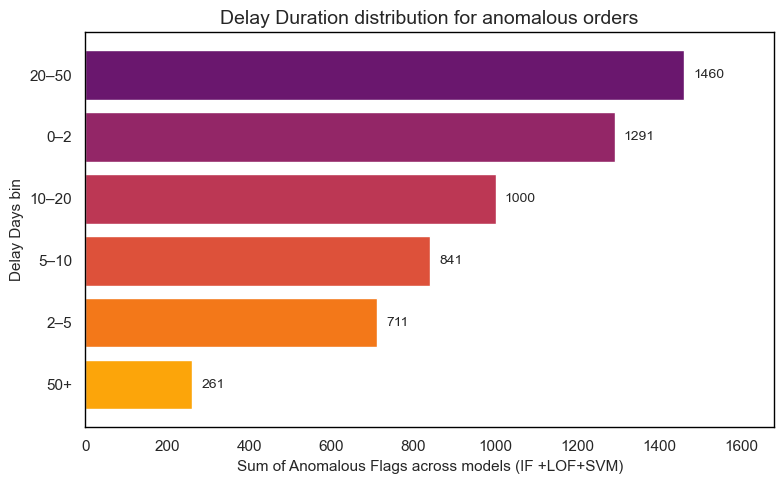

,Delay Bin (Days),Combined Flag Sum
0,20–50,1460
1,0–2,1291
2,10–20,1000
3,5–10,841
4,2–5,711
5,50+,261


In [123]:
delay_df = valid_orders_df.copy()

# Dealy bins
delay_df['delay_bin'] = pd.cut(delay_df['delay_days'], bins=[0, 2, 5, 10, 20, 50, np.inf], 
                                labels=['0–2', '2–5', '5–10', '10–20', '20–50', '50+'])

combined_counts_delay = (
    delay_df.groupby('delay_bin')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

top_delay = combined_counts_delay.reset_index()
top_delay.columns = ['Delay Bin (Days)', 'Combined Flag Sum']

# Plot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    top_delay['Delay Bin (Days)'],
    top_delay['Combined Flag Sum'],
    color=plt.cm.inferno(np.linspace(0.3, 0.8, len(top_delay)))
)
ax.invert_yaxis()
ax.set_title('Delay Duration distribution for anomalous orders', fontsize=14)
ax.set_xlabel('Sum of Anomalous Flags across models (IF +LOF+SVM)', fontsize=11)
ax.set_ylabel('Delay Days bin', fontsize=11)
xmax = top_delay['Combined Flag Sum'].max()
ax.set_xlim(right=xmax * 1.15)
ax.grid(False)
for bar in bars:
    width = bar.get_width()
    ax.text(width + xmax * 0.015, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

display(top_delay)


C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\2652028750.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_df.groupby('distance_bin')['combined_flag_count']


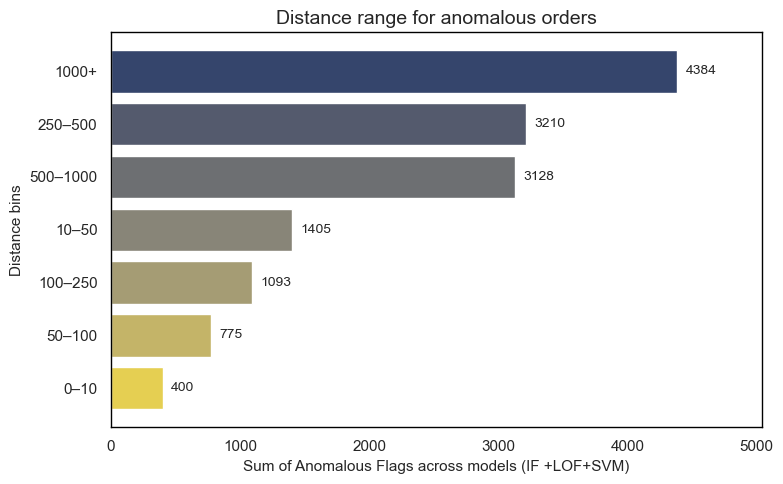

,Distance Bin (km),Combined Flag Sum
0,1000+,4384
1,250–500,3210
2,500–1000,3128
3,10–50,1405
4,100–250,1093
5,50–100,775
6,0–10,400


In [124]:
distance_df = valid_orders_df.copy()
# Distance bins
distance_df['distance_bin'] = pd.cut(distance_df['distance_km'], bins=[0, 10, 50, 100, 250, 500, 1000, np.inf], 
                                     labels=['0–10', '10–50', '50–100', '100–250', '250–500', '500–1000', '1000+'])

combined_counts_dist = (
    distance_df.groupby('distance_bin')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

top_distance = combined_counts_dist.reset_index()
top_distance.columns = ['Distance Bin (km)', 'Combined Flag Sum']

# Plot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    top_distance['Distance Bin (km)'],
    top_distance['Combined Flag Sum'],
    color=plt.cm.cividis(np.linspace(0.2, 0.9, len(top_distance)))
)
ax.invert_yaxis()
ax.set_title('Distance range for anomalous orders', fontsize=14)
ax.set_xlabel('Sum of Anomalous Flags across models (IF +LOF+SVM)', fontsize=11)
ax.set_ylabel('Distance bins', fontsize=11)
xmax = top_distance['Combined Flag Sum'].max()
ax.set_xlim(right=xmax * 1.15)
ax.grid(False)
for bar in bars:
    width = bar.get_width()
    ax.text(width + xmax * 0.015, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

display(top_distance)


C:\Users\Arushi\AppData\Local\Temp\ipykernel_26504\251201720.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_value_df.groupby('order_value_bin')['combined_flag_count']


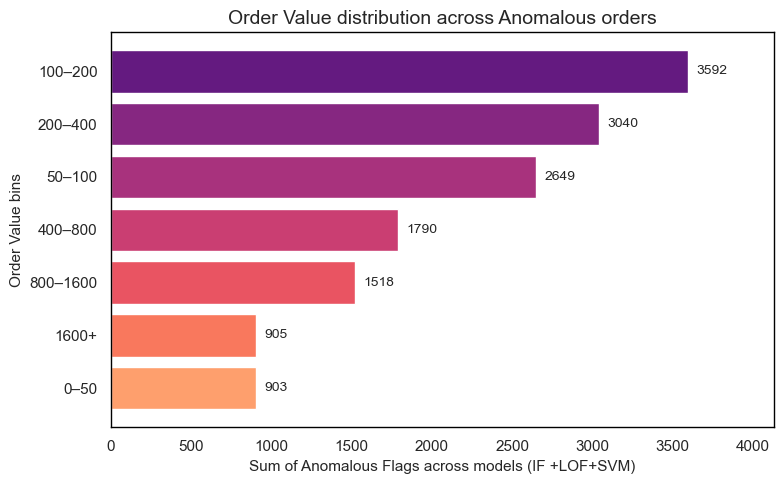

,Order Value Bin,Combined Flag Sum
0,100–200,3592
1,200–400,3040
2,50–100,2649
3,400–800,1790
4,800–1600,1518
5,1600+,905
6,0–50,903


In [125]:
order_value_df = valid_orders_df.copy()

# Defining bins and labels for total payment value
order_value_df['order_value_bin'] = pd.cut(
    order_value_df['total_payment_value'],
    bins=[0, 50, 100, 200, 400, 800, 1600, np.inf],
    labels=['0–50', '50–100', '100–200', '200–400', '400–800', '800–1600', '1600+']
)

# Sum of anomaly flags per bin
combined_counts_value = (
    order_value_df.groupby('order_value_bin')['combined_flag_count']
    .sum()
    .sort_values(ascending=False)
)

top_order_value = combined_counts_value.reset_index()
top_order_value.columns = ['Order Value Bin', 'Combined Flag Sum']

# Plot
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

bars = ax.barh(
    top_order_value['Order Value Bin'],
    top_order_value['Combined Flag Sum'],
    color=plt.cm.magma(np.linspace(0.3, 0.8, len(top_order_value)))
)
ax.invert_yaxis()
ax.set_title('Order Value distribution across Anomalous orders', fontsize=14)
ax.set_xlabel('Sum of Anomalous Flags across models (IF +LOF+SVM)', fontsize=11)
ax.set_ylabel('Order Value bins', fontsize=11)
xmax = top_order_value['Combined Flag Sum'].max()
ax.set_xlim(right=xmax * 1.15)
ax.grid(False)

# Adding labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + xmax * 0.015, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

display(top_order_value)
